# Social Graphs and Interactions - Final Project
## Analysis of the Harry Potter Fandom Wikipedia, books and scripts.
   ** Authors: **
   * Terkel Bo Olsen (s144299)
   * Athina Tsagkari (s163016)
   * Jan Franciszek Szwagierczak (s175309)

# Table of contents
[Motivation](#motivation)

[1 - Introduction](#introduction)

[2 - Description of the dataset](#Description)

[3 - Creating the network](#network)

[4 - Network statistics](#statistics)

[5 - Community analysis](#community)

[6 - TF-IDF and Wordclouds](#wordclouds)

[7 - Using NLTK to investigate spells](#spells)

[8 - In depth text analysis of the books and movie scripts](#text)

[9 - LabMT based sentiment analysis](#sentiment)

[10 - Discussion and conclusion](#discussion)

# Motivation <a name="motivation"></a>

The Harry Potter universe is very developed both through the seven books by J.K Rowling and the 8 movies which have been huge successes. Many people know the Harry Potter universe and hence we hope that it will be easy to identify with the outcomes of the different analyses. The community behind the Harry Potter universe is large and hence fan-made Wikipedia pages are available with very detailed information about every character. Furthermore, the Wikipages are build as regular Wikipages meaning that where possible the pages links to other pages on the same Wikipedia. Our goal with this project is to show how simple analyses based on counts, i.e. TF-IDF, can create insights into topic modelling of books and movies and how different words are unique to different characters. Finally, we would like to present sentiment analyses of the books and movies to see the development of sentiment throughout the series. Hopefully, a reader with domain knowledge of the Harry Potter universe will be able to identify with the outcomes of the analyses and in this way be impressed with what simple counting procedures and in natural language processing can provide really interesting insights and how network analysis can be used to investigate importance of characters.

# 1 - Introduction <a name="introduction"></a>

This notebook investigates the structure of the Harry Potter universe by using the [Fandom Wikipedia](http://harrypotter.wikia.com/wiki/Main_Page) to create a directed network based on the information provided from the Wikipedia pages of each character. The network is constructed by investigating which other characters a specific characters links to and from this creating a directed network graph. Having constructed the network it will be possible to investigate basic statistics and compare the network degree structure to other known types of networks.

Furthermore, the plain text Harry Potter books and movie scripts have been acquired such that TF-IDF analyses can be carried out to provide Wordcloud for important characters, the whole book and movie scripts. Furthermore, we carry out a sentiment analysis of the books versus the corresponding movie based on the LabMT word list provided in the course. The books and movie scripts can be found from the below sources:

* Book 1: [Philosopher's Stone](https://archive.org/stream/Book5TheOrderOfThePhoenix/Book%201%20-%20The%20Philosopher%27s%20Stone#page/n5/mode/2up)
* Book 2: [Chamber of Secrets](https://archive.org/stream/Book5TheOrderOfThePhoenix/Book%202%20-%20The%20Chamber%20of%20Secrets#page/n0/mode/2up)
* Book 3: [Prisoner of Azkaban](https://archive.org/stream/Book5TheOrderOfThePhoenix/Book%203%20-%20The%20Prisoner%20of%20Azkaban#page/n1/mode/2up)
* Book 4: [Goblet of Fire](https://archive.org/stream/Book5TheOrderOfThePhoenix/Book%204%20-%20The%20Goblet%20of%20Fire#page/n0/mode/2up)
* Book 5: [Order of the Phoenix](https://archive.org/stream/Book5TheOrderOfThePhoenix/Book%205%20-%20The%20Order%20of%20the%20Phoenix#page/n0/mode/2up)
* Book 6: [Half Blood Prince](https://archive.org/stream/Book5TheOrderOfThePhoenix/Book%206%20-%20The%20Half%20Blood%20Prince#page/n0/mode/2up)
* Book 7: [Deathly Hallows](https://archive.org/stream/Book5TheOrderOfThePhoenix/Book%207%20-%20The%20Deathly%20Hallows#page/n0/mode/2up)


* Script 1: [Philosopher's Stone](http://tomfeltonandmore.tripod.com/home/id9.html)
* Script 2: [Chamber of Secrets](http://www.gazette-du-sorcier.com/IMG/pdf/CoS_Script.pdf)
* Script 3: [Prisoner of Azkaban](http://www.gazette-du-sorcier.com/IMG/pdf/Azkabanscript.pdf)
* Script 4: [Goblet of Fire](https://genius.com/Steven-kloves-harry-potter-and-the-goblet-of-fire-script-annotated)
* Script 5: [Order of the Phoenix](http://www.dailyscript.com/scripts/HARRY-POTTER-AND-THE-ORDER-OF-THE-PHOENIX-2007-by-Michael-Goldenberg.pdf)
* Script 6: [Half Blood Prince](http://screenplayexplorer.com/wp-content/scripts/Half-Blood_Prince.pdf)
* Script 7: [Deathly Hallows Part 1](http://www.gazette-du-sorcier.com/IMG/pdf/Harry_Potter_and_the_Deathly_Hallows_-_Part_1.pdf)
* Script 8: [Deathly Hallows Part 2](https://www.scribd.com/doc/163084623/HARRY-POTTER-AND-THE-DEATHLY-HALLOWS-PART-2-by-screenplay-Steve-Kloves)

Lastly, we investigate the development of the usage of the different spells throughout the series. A complete list of spells is found from:

* List of spellls: [Harry Potter list of spells](https://www.pojo.com/harry-potter-spell-list/)


# 2 - Description of the dataset<a name="Description"></a>

The API of the [Fandom Wikipedia](http://harrypotter.wikia.com/wiki/Main_Page) site only allows for querying list of characters categorized into different categories and a small summary of each characters Wikipedia page. Fortunately, they provide an XML-file, which can be downloaded from our website, that contains text of all current pages. The file has a size of 179 mb and is structured in XML format, i.e. a tree structure. It contains in total 104996 pages each with 5 tree keys like title, id, revisions etc. 

The API is used to acquire categories of the different characters and then from this only read the relevant text from the XML based on the list of characters.

# 3 - Creating the network<a name="network"></a>

In [1]:
import warnings                                          #ignore warnings like DeprecationWarning
warnings.filterwarnings("ignore")

import numpy as np                                       #For numerical calculation

import urllib2                                           #Reading text from queries
import json                                              #Structuring query output

import textract                                          #Easy read of all filetypes

import os
import os.path                                           #For local path structures

import re                                                #Extracting links etc. + cleaning text

import xmltodict                                         #Reading the XML file to a dict

import pandas as pd                                      #Creating DataFrames

import matplotlib.pyplot as plt                          #General plotting, dependency for NetworkX plot tools
from IPython.display import display, HTML                #Centering of plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: center;
}
</style>
""")

import networkx as nx                                   #Networks

import nltk                                             #Natural language processing tool kit
from nltk.tokenize import RegexpTokenizer

import community                                        #Louvain algorithm for community detection

import operator                                         #Sorting etc.
from collections import Counter                         #Counting occurences


from wordcloud import WordCloud                         #Wordclouds
from scipy.misc import imread                           #Reading masks of Wordclouds

import io                                               #Reading files
import unicodedata                                      #Convert utf-8
from nltk.util import ngrams                            #For n-grams

We start by selecting 6 major categories from the Fandom Wikipedia where these are represented by the four housing at Hogwarts, all muggles and other Wizards. This provides us with a large list of characters which the network is then constructed upon.

In [2]:
#Make a list of interesting categories
categories = ['Wizards','Muggles','Slytherins','Hufflepuffs','Ravenclaws','Gryffindors']

#make dict with categories as keys 
characters_categorized = dict()

for category in categories:
    baseurl = "http://harrypotter.wikia.com/api/v1/Articles/List?" #Harry Potter Fandom API URL
    expand = "expand=1"                                            #Keyword to query
    limit = 'limit=3000'                                           #Basically get all characters names and ID's in the categories
    category_query='category='+category.replace(' ','+')           #Query a specific category
    query = "%s%s&%s&%s" % (baseurl,expand,category_query,limit)   #Construct query
        
    wikiresponse = urllib2.urlopen(query)                          #Fetch data
    wikisource = wikiresponse.read()                               #Read
    dict_wiki = json.loads(wikisource)                             #Convert to JSON
    
    temp_dict = {} 
    for items in dict_wiki['items']:
        temp_dict[str(items['id'])] = items['title']               #Extract and arrange {'id':'name'}
        
    characters_categorized[category.replace('+',' ')] = temp_dict  #make dict of dicts

As explained the Fandom Wikipedia API only allows to retrieve summaries of each characters Wikipedia page. To retrieve the full texts, the XML file is loaded with the handy xmltodict function which converts the XML tree structure into a nice Python dictionary.

In [3]:
os.chdir("C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/Final Project")
with open('harrypotter_pages_current.xml') as f:
    parsed = xmltodict.parse(f.read())          #parse the XML file containing texts of all pages

Now, extract all pages from the dictionary:

In [4]:
all_pages = parsed['mediawiki']['page']         #index the XML dict

Now, we loop over all the pages in the dictionary and each time check if that page is in the list extracted earlier, in this way we only retrieve the pages of characters that we find relevant and avoid all other pages providing general information of the Harry Potter universe.

In [5]:
#Manually extract the text from the XML dict and arrange into new dict
text = {}

for page in all_pages: #loop over all pages and check if part of characters_categorized
    if page['id'] in characters_categorized['Wizards']:
        name = characters_categorized['Wizards'][page['id']]
        text[name] = page['revision']['text']['#text']
    elif page['id'] in characters_categorized['Muggles']:
        name = characters_categorized['Muggles'][page['id']]
        text[name] = page['revision']['text']['#text']
    elif page['id'] in characters_categorized['Slytherins']:
        name = characters_categorized['Slytherins'][page['id']]
        text[name] = page['revision']['text']['#text']
    elif page['id'] in characters_categorized['Gryffindors']:
        name = characters_categorized['Gryffindors'][page['id']]
        text[name] = page['revision']['text']['#text']
    elif page['id'] in characters_categorized['Hufflepuffs']:
        name = characters_categorized['Hufflepuffs'][page['id']]
        text[name] = page['revision']['text']['#text']
    elif page['id'] in characters_categorized['Ravenclaws']:
        name = characters_categorized['Ravenclaws'][page['id']]
        text[name] = page['revision']['text']['#text']

#remove some nodes manually (These are not characters)
del text['Wizardkind'] 
del text['Muggle']

Now, the network can be created with NetworkX by first using a RegEx expression to extract all links from the page such that edges can be correctly connected to the respective nodes. Furthermore, we use the set_node_attributes to provide a classification based on the categories acquired by using the Fandom Wikipedia API.

In [6]:
#create nodes
harry_potter_graph = nx.DiGraph()              #create directed graph
harry_potter_graph.add_nodes_from(text.keys()) #add nodes from the text-dict

for character in text.keys():
    list_links = re.findall(ur'\n.*?\[\[(:*\w*:*[A-Z\u0130ÉÞ].*?)(?:\||\]\])', text[character]) #extract links of that page

    connections = list(set(list_links).intersection(text.keys())) #find intersection withs graph nodes
    for connection in connections:
        harry_potter_graph.add_edge(character,connection)         #add all connection one by one
    
    #Set node attributes
    if character in characters_categorized['Gryffindors'].values():
        nx.set_node_attributes(harry_potter_graph,'classification',{character:'Gryffindors'})
    elif character in characters_categorized['Slytherins'].values():
        nx.set_node_attributes(harry_potter_graph,'classification',{character:'Slytherins'})
    elif character in characters_categorized['Ravenclaws'].values():
        nx.set_node_attributes(harry_potter_graph,'classification',{character:'Ravenclaws'})
    elif character in characters_categorized['Hufflepuffs'].values():
        nx.set_node_attributes(harry_potter_graph,'classification',{character:'Hufflepuffs'})
    elif character in characters_categorized['Muggles'].values():
        nx.set_node_attributes(harry_potter_graph,'classification',{character:'Muggles'})
    else:
        nx.set_node_attributes(harry_potter_graph,'classification',{character:'Other Wizard'})


Now, let's investigate the structure of the network:

In [7]:
print 'The network consists of {} nodes'.format(len(harry_potter_graph.nodes()))
print 'Where {} are isolates (no connections) corresponding to {}%'.format(len(nx.isolates(harry_potter_graph)),round(100*float(len(nx.isolates(harry_potter_graph)))/len(harry_potter_graph.nodes()),2))

The network consists of 2011 nodes
Where 933 are isolates (no connections) corresponding to 46.39%


From this it is clearly seen that the network currently created is very sparse with respect to edges and there exists alot of isloate nodes. These isolates exists as some of the Wikipedia pages provide very little information of that certain character and hence no links are present. Furthermore, it is seen that the network size is quite large so these isolates can be removed and the network would still be very large. 

In [8]:
#removing all isolates
harry_potter_graph.remove_nodes_from(nx.isolates(harry_potter_graph)) 

Now, a first plot of the created network is created with node size increasing with node degree and using a random coloring scheme:

In [9]:
savePath = 'C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/Final Project/Img'

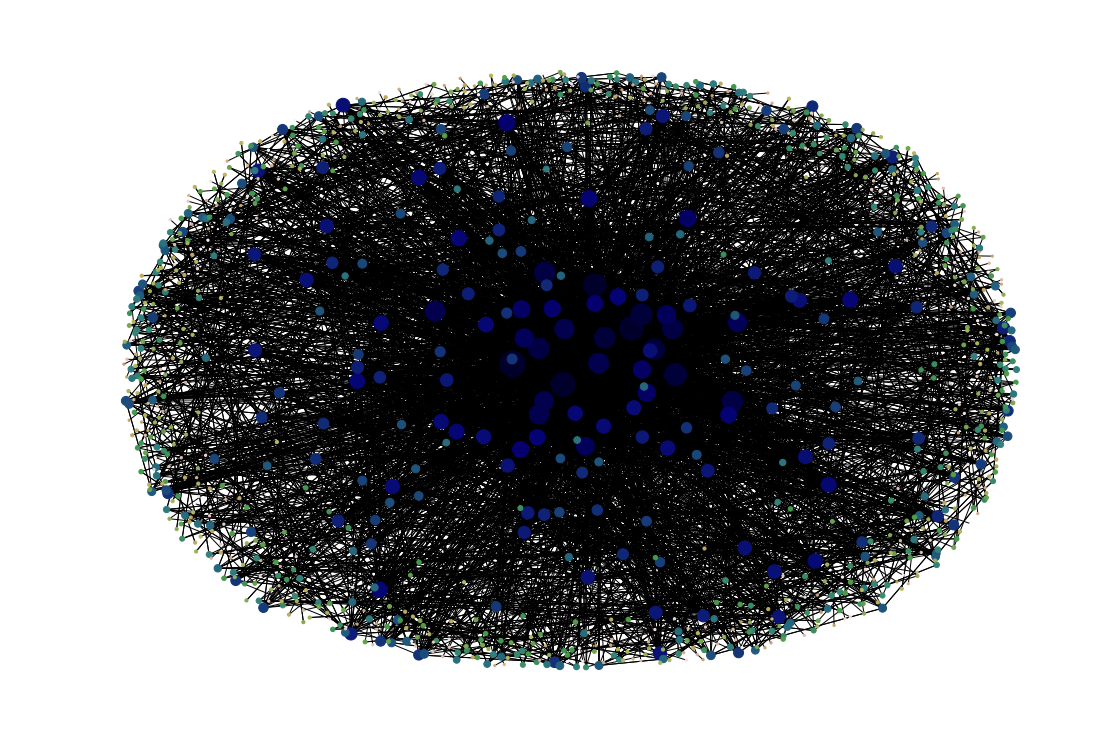

In [10]:
plt.figure(figsize=(15,10)) #set the size of the figure

#get sorted list of nodes and degrees so these correspond
nodes = sorted(harry_potter_graph.nodes(), key = harry_potter_graph.degree, reverse=True)
degrees = sorted([harry_potter_graph.degree(node) for node in nodes], reverse=True)
node_size_list = [5*degree for degree in degrees]

layout = nx.spring_layout(harry_potter_graph,k=0.8) #use spring layout

#plot network on some Harry Potter 'like' color scale
nx.draw(harry_potter_graph,
        layout,
        cmap=plt.cm.gist_earth,
        edge_color='black',
        nodelist=nodes,
        node_size=node_size_list, #make nodes larger based on degree
        node_color=range(len(harry_potter_graph.nodes())),
        arrows=False)
#plt.savefig(os.path.join(savePath,'basic_network.png'))
plt.show()

Now make the same plot but with a coloring scheme given by the categories provided from the Fandom Wikipedia API:

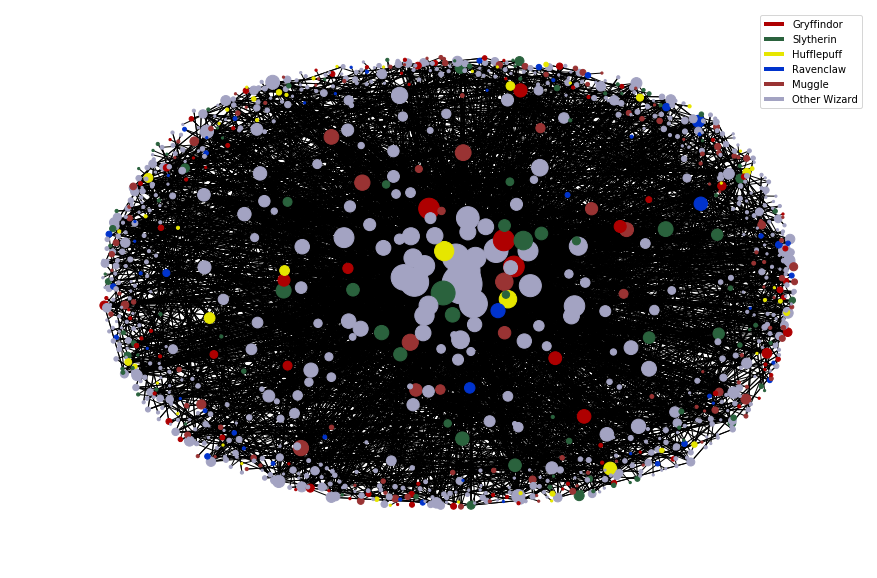

In [11]:
plt.figure(figsize=(15,10)) #set size of figure

colors = [] #create a list of colors sorted by classification attribute
for n in nx.get_node_attributes(harry_potter_graph,'classification').values():
    if n == 'Gryffindors':
        colors.append('#ae0001')
    elif n == 'Slytherins':
        colors.append('#2a623d')
    elif n == 'Hufflepuffs':
        colors.append('#e6e600')
    elif n == 'Ravenclaws':
        colors.append('#0033cc')
    elif n == 'Other Wizard':
        colors.append('#a3a3c2')
    else:
        colors.append('#993333')
        
#use plt to plot legends in the NetworkX Graph
plt.hlines(0,0,0,label='Gryffindor',colors='#ae0001', linewidth=4)
plt.hlines(0,0,0,label='Slytherin',colors='#2a623d',linewidth=4)
plt.hlines(0,0,0,label='Hufflepuff',colors='#e6e600',linewidth=4)
plt.hlines(0,0,0,label='Ravenclaw',colors='#0033cc',linewidth=4)
plt.hlines(0,0,0,label='Muggle',colors='#993333',linewidth=4)
plt.hlines(0,0,0,label='Other Wizard',colors='#a3a3c2',linewidth=4)
plt.legend()

#draw the network using the spring layout
nx.draw(harry_potter_graph,
        layout,
        edge_color='black',
        nodelist=nodes,
        node_size=node_size_list,
        node_color=colors,
        arrows=False)
#plt.savefig(os.path.join(savePath,'categorized_network.png'))
plt.show()

# 4 - Network statistics<a name="statistics"></a>

Now, some basic network statistics are investigated. These include in- and out-degree, centrality measures etc.

First, let's create a handy helper function to print some nice DataFrames for the website:

In [12]:
def print_dataframe(fields,headers):
    dataframe = pd.DataFrame(fields,columns=headers)
    dataframe.index = dataframe.index+1
    display(dataframe[headers])

Now, calculate the different statistics and print these:

In [13]:
#get the degrees of each node
degrees_values = harry_potter_graph.degree().values()
degrees = sorted(harry_potter_graph.degree().iteritems(), key=operator.itemgetter(1), reverse=True)
    
#calculate betweenness
betweenness = sorted(nx.betweenness_centrality(harry_potter_graph).iteritems(),key=operator.itemgetter(1),reverse=True)[:10] #print only top 10
print_dataframe(betweenness,['Node','Betweenness Centrality'])
    
#calculate eigenvector centrality
eigenvector = sorted(nx.eigenvector_centrality(harry_potter_graph).iteritems(),key=operator.itemgetter(1),reverse=True)[:10] #print only top 10
print_dataframe(eigenvector,['Node','Eigenvector Centrality'])

Node  Betweenness Centrality
1         Harry Potter                0.090089
2           Tom Riddle                0.048208
3     Albus Dumbledore                0.030794
4       Ronald Weasley                0.027132
5       Arthur Weasley                0.020053
6     Hermione Granger                0.018468
7         Sirius Black                0.018215
8   Minerva McGonagall                0.018212
9   Neville Longbottom                0.017840
10       Rubeus Hagrid                0.017794

Node  Eigenvector Centrality
1       Harry Potter                0.281382
2     Ronald Weasley                0.206066
3     Arthur Weasley                0.201312
4         Tom Riddle                0.201151
5    Ginevra Weasley                0.193835
6      Molly Weasley                0.192697
7   Hermione Granger                0.185975
8   Albus Dumbledore                0.176341
9    William Weasley                0.165596
10      Albus Potter                0.164354

In [14]:
#print some degree statistics
print 'Degree statistics are as follows...'
print 'Number of nodes in the network:', len(harry_potter_graph.nodes())
print 'Number of edges in the network:', len(harry_potter_graph.edges())
print 'Average degree:', np.average(degrees_values)
print 'Median Degree:', np.median(degrees_values)   

Degree statistics are as follows...
Number of nodes in the network: 1078
Number of edges in the network: 5211
Average degree: 9.66790352505
Median Degree: 3.0


In [15]:
#get in and out degrees
in_degree_values = sorted(harry_potter_graph.in_degree().values())
in_degrees = sorted(harry_potter_graph.in_degree().iteritems(), key=operator.itemgetter(1), reverse=True)

out_degree_values = sorted(harry_potter_graph.out_degree().values())
out_degrees = sorted(harry_potter_graph.out_degree().iteritems(), key=operator.itemgetter(1), reverse=True)
        
print 'Average in-degree:', np.average(in_degree_values)
print 'Average out-degree:', np.average(out_degree_values)

Average in-degree: 4.83395176252
Average out-degree: 4.83395176252


In [16]:
print '\nTop 10 nodes by in-degree:'
print_dataframe(in_degrees[:10],['Node','Degree'])
print 'Top 10 nodes by out-degree:'
print_dataframe(out_degrees[:10],['Node','Degree'])
    
#print the total node degree (sum of in and out degree)
print 'Top 10 nodes by total degree:'
print_dataframe(degrees[:10],['Node','Degree'])  



Top 10 nodes by in-degree:


Node  Degree
1       Harry Potter     246
2         Tom Riddle     142
3   Albus Dumbledore     111
4     Ronald Weasley      98
5   Hermione Granger      85
6       Sirius Black      74
7     Arthur Weasley      73
8       Draco Malfoy      61
9    Ginevra Weasley      60
10   Horace Slughorn      60

Top 10 nodes by out-degree:


Node  Degree
1       Harry Potter      74
2     Ronald Weasley      65
3     Arthur Weasley      59
4         Tom Riddle      59
5   Hermione Granger      59
6    Ginevra Weasley      54
7      Molly Weasley      52
8   Albus Dumbledore      45
9     George Weasley      45
10   William Weasley      44

Top 10 nodes by total degree:


Node  Degree
1       Harry Potter     320
2         Tom Riddle     201
3     Ronald Weasley     163
4   Albus Dumbledore     156
5   Hermione Granger     144
6     Arthur Weasley     132
7    Ginevra Weasley     114
8       Sirius Black     114
9      Molly Weasley     103
10      Draco Malfoy      97

From the above it is quite clear that Harry Potter is the most central node in the network as would be expected. Furthermore, the Weasley's, Hermione and the characters from the Order of the Phoinex are also quite central by all measures.

Now, let's investigate the degree distribution by plotting the in- and out-degrees on linear and log-log axis:

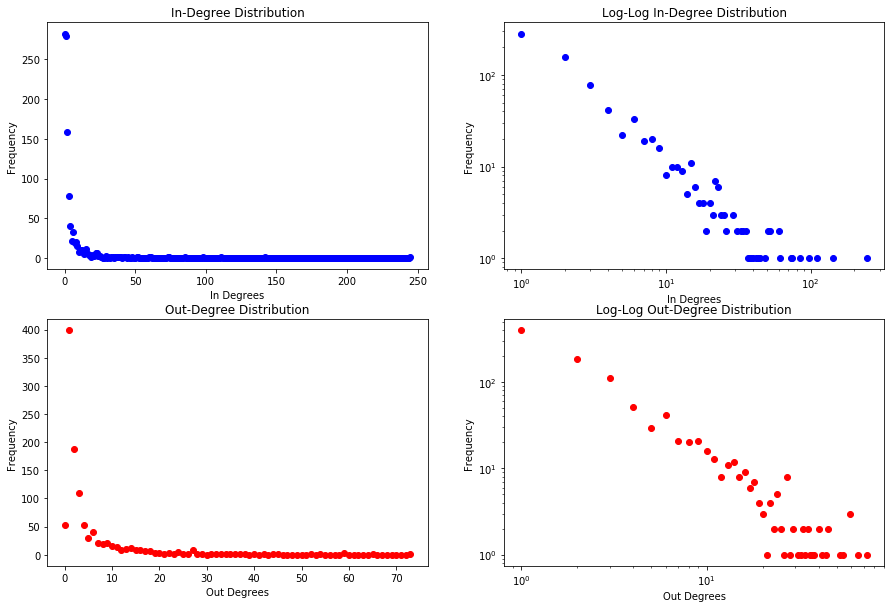

In [17]:
#bin the in- and out-degrees
bins_in = range(min(in_degree_values),max(in_degree_values))
hist_in,bin_edges = np.histogram(in_degree_values, max(in_degree_values))
bins_out = range(min(out_degree_values),max(out_degree_values))
hist_out,bin_edges = np.histogram(out_degree_values, max(out_degree_values))

fig, ax = plt.subplots(2,2,figsize=(15,10)) #create a 2x2 subplot

ax[0][0].plot(bins_in,hist_in,'bo')
ax[0][0].set_title("In-Degree Distribution")
ax[0][0].set_xlabel('In Degrees')
ax[0][0].set_ylabel('Frequency')

ax[0][1].loglog(bins_in,hist_in,'bo')
ax[0][1].set_title("Log-Log In-Degree Distribution")
ax[0][1].set_xlabel('In Degrees')
ax[0][1].set_ylabel('Frequency')


ax[1][0].plot(bins_out,hist_out,'ro')
ax[1][0].set_title("Out-Degree Distribution")
ax[1][0].set_xlabel('Out Degrees')
ax[1][0].set_ylabel('Frequency')

ax[1][1].loglog(bins_out,hist_out,'ro')
ax[1][1].set_title("Log-Log Out-Degree Distribution")
ax[1][1].set_xlabel('Out Degrees')
ax[1][1].set_ylabel('Frequency')

#plt.savefig(os.path.join(savePath,'in_out_degree.png'))
plt.show()

Both the in- and out-degree distribution follows a power law meaning that these networks are scale-free networks as defined in the book on [Network Science](http://barabasi.com/networksciencebook). This feature is the same as the real social network and hence this indicates that the network of the Harry Potter universe resembles that of the real world social network. This means that contrary to a random network, that large hubs exists in the network and this was clearly seen from the table of node degrees where hubs like Harry Potter, Tom Riddle and Harry's closest friends act as hubs.

# 5 - Community analysis<a name="community"></a>

Now, we move on to do community analysis of the network. Community measures works only on a undirected graph type and hence the directed graph is converted to an undirected graph. Then, we extract the giant component of the network, meaning the largest component of nodes that are fully connected such that no nodes are isolated per default. The basic idea behind the community analysis is to analyse which groups of people in the largest fully connected subgraph of network have most in common based on their which people they are connected to. This can be measured a measure called the 'modularity' of the network which will be further explained in detail below. By having already partioned the network into different subgroups based on the categories obtained from the Fandom Wikipedia a measure of modularity can be calculated for these partitions and further comparing this to the modularity of the partitions obtained by a community analysis algorithm like the Louvain algorithm. Further, by considering the current categories as the 'ground truth' then it will be interesting to observe how and why an unbiased community algorithm probably will obtain different partitions than the ground truth. Then by comparing the different types of partitions maybe it will be possible to tell why the algorithm partitioned as it did.

First, the network is converted to an undirected graph and then the giant connected component is extracted:

In [18]:
gcc = sorted(nx.connected_component_subgraphs(harry_potter_graph.to_undirected()),key=len,reverse=True)[0]
print 'The giant connected component has',len(gcc.nodes()),'nodes'
print 'The giant connected component has',len(gcc.edges()),'edges'

The giant connected component has 865 nodes
The giant connected component has 3450 edges


Now, a plot of the giant component is created where each 'ground truth' categories are split uniformly on a circle with radius $r$ such to obtain a community like structure. It should be noted that no community analysis has been performed yet and the so called partitions are the ones provided from the categories extracted by the Fandom Wikipedia API:

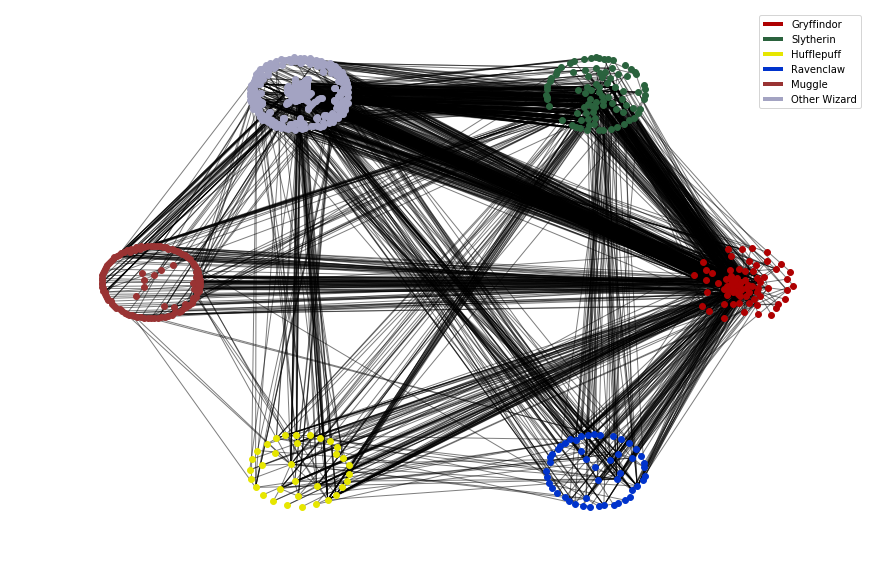

In [20]:
plt.figure(figsize=(15,10))

colors = ['#ae0001','#2a623d','#a3a3c2','#993333','#e6e600','#0033cc'] #HTML codes for Gryff, Slyth, Other Wiz, Mugg, Huffp, Ravenc

#Add the legends as before
plt.hlines(0,0,0,label='Gryffindor',colors='#ae0001', linewidth=4)
plt.hlines(0,0,0,label='Slytherin',colors='#2a623d',linewidth=4)
plt.hlines(0,0,0,label='Hufflepuff',colors='#e6e600',linewidth=4)
plt.hlines(0,0,0,label='Ravenclaw',colors='#0033cc',linewidth=4)
plt.hlines(0,0,0,label='Muggle',colors='#993333',linewidth=4)
plt.hlines(0,0,0,label='Other Wizard',colors='#a3a3c2',linewidth=4)
plt.legend()

partition = nx.get_node_attributes(gcc,'classification') #get the 'partition' that we created by grouping by dorms etc

angle = (2.0 * np.pi) / len(set(partition.values())) #We want to arrange communities into a 'circle' network with equal angle diff
radius = 3 #radius of circle network
angle_position = np.arange( 0 , 2.0 * np.pi , angle ) #get a vector of angle positions
offsets = np.asarray([(radius * np.cos(position) , radius * np.sin(position)) for position in angle_position]) #coordinates

all_positions = dict() #preallocate a dict
for j, part in enumerate( set(partition.values()) ):
    nodes_list = [nodes for nodes in partition.keys() if partition[nodes] == part]
    
    pos = nx.spring_layout(gcc.subgraph(nodes_list)) #calculate internal community layout

    for k in nodes_list:
        pos[k] = [ pos[k][0] + offsets[j][0], pos[k][1] + offsets[j][1] ] #move the communities/partition to the right center coordinates

    color = colors.pop(0) #update color scheme from dict
    
    nx.draw_networkx_nodes(nodes_list, pos, nodes_list, node_size = 35, node_color = color) #draw network
    all_positions.update(pos) #update position dict

nx.draw_networkx_edges(gcc,all_positions, alpha=0.5) #draw edges
plt.axis('off') #remove the axes
#plt.savefig(os.path.join(savePath,'grouped_network.png'))
plt.show()


Now, let's use this current network community structure to calculate the modularity of the network. Modularity can be thought of as a way of analyzing potential communities by comparing a potential community to the community that could be formed if randomness was introduced into the same network. If we get $M$ as the way of measuring modularity (Eq. 9.12 in [Network Science](http://barabasi.com/networksciencebook/)) then if $M$ is positive the potential community has more links than expected when comparing to a random network. When $M$ is zero then the community links are fully explained by the random variable determining the underlying links (i.e. fully explained by the link distribution) and if $M$ is negative there is less links in the community than when compared to random.

First, create a function that calculates the modularity based on the Eq. referenced above:

In [21]:
def calculateModularity(G,grouped_dict):
    if isinstance(G,nx.DiGraph):
        print 'Modularity only works on a undirected graphs'
        return
    
    L = len(G.edges()) #get number of edges
    N = len(G.nodes()) #get number of nodes

    Lc = np.empty(len(np.unique(nx.get_node_attributes(G,'classification').values()))) #preallocate list for calculation
    kc = np.empty(len(np.unique(nx.get_node_attributes(G,'classification').values()))) #preallocate list for calculation
    i = 0
    for _,v in grouped_dict.items(): #loop over names in each branch
        Lc[i] = len(v) #number of nodes in that community
        kc[i] = sum(G.subgraph(v).degree().values()) #total degree of nodes in that community
        i += 1

    #calculate modularity
    M = sum(Lc/L-(kc/(2*L))**2) #(Eq. 9.12)
    
    return M

Now, arrange a grouped_dict in the fashion needed for the calculateModularity function and use the function to calculate the modularity:

In [22]:
#make a grouped dict that fits the calculateModularity function
grouped_dict = {
    'Gryffindors':list(),
    'Slytherins':list(),
    'Ravenclaws':list(),
    'Hufflepuffs':list(),
    'Muggles':list(),
    'Other Wizard':list()
}
for k,v in nx.get_node_attributes(gcc,'classification').items():
    grouped_dict[v].append(k) #append items


print 'The modularity calulcated on the six categories is {}.'.format(round(calculateModularity(gcc,grouped_dict),2))

The modularity calulcated on the six categories is 0.19.


Now, the current six categories provide a modularity of 0.19, which is not significantly high but this is expected as the structure of the Harry Potter universe is way to complex to be represented solely by 6 categories. By using the Louvain algorithm provided in the community package we might obtain a better community structure in the network:

In [23]:
#use louvain alogrithm to compute the best partition
partition = community.best_partition(gcc)
print 'The modularity calculated by on the found partition by the Louvain algorithm was {}'.format(round(community.modularity(partition,gcc),2))
print 'By using {} communities'.format(len(Counter(partition.values())))

The modularity calculated by on the found partition by the Louvain algorithm was 0.48
By using 20 communities


It is seen that the Louvain algorithm finds 20 partitions as compared to the six partitions provided by the default categories and from these 20 partitions the modularity has been increased to 0.48. This is a quite significant change indicating a stronger community structure in the network.

Now, let's investigate visually how the 6 categories has been distributed in the 20 new partitions by make a network plot similar to as before but now having the 20 communities uniformly spread on the circle and keeping the node colors the same as used for the categories previously. In this way it is easily visualized to which 'ground truth' category each character was originally assigned:

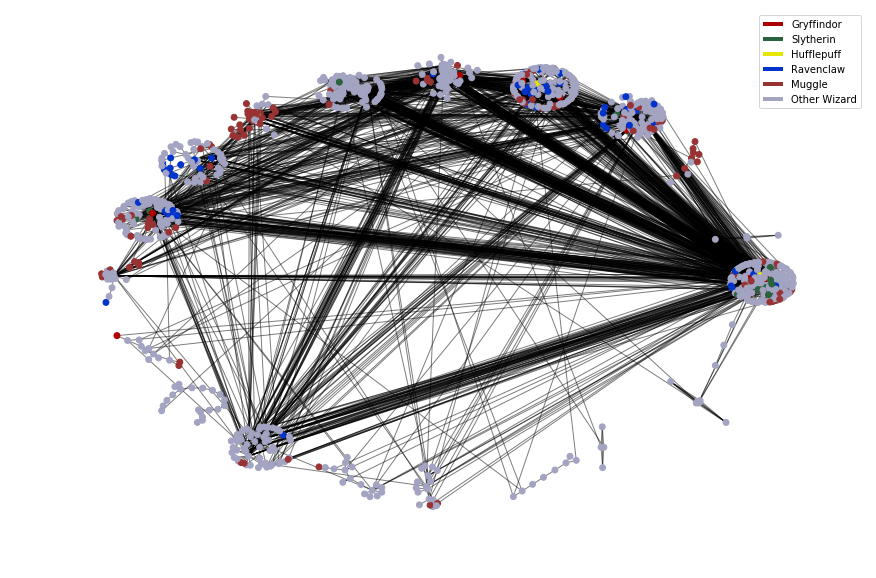

In [24]:
plt.figure(figsize=(15,10))

colors = ['#ae0001','#2a623d','#a3a3c2','#993333','#e6e600','#0033cc'] #Gryff, Slyth, Other Wiz, Mugg, Huffp, Ravenc

#lookup color table of HTML codes
color_table = {
    'Gryffindors': '#ae0001',
    'Slytherins': '#2a623d',
    'Hufflepuffs': '#e6e600',
    'Ravenclaws':'#0033cc',
    'Muggles':'#993333',
    'Wizards': '#a3a3c2'
}

#make a grouped dict
characters_group = dict()
for k,v in characters_categorized.items():
    characters_temp = v.values()
    for characters in characters_temp:
        characters_group[characters] = k #dict is arranged like {'character':'Classification'} used for lookup of color scheme

#Add legends in the same way
plt.hlines(0,0,0,label='Gryffindor',colors='#ae0001', linewidth=4)
plt.hlines(0,0,0,label='Slytherin',colors='#2a623d',linewidth=4)
plt.hlines(0,0,0,label='Hufflepuff',colors='#e6e600',linewidth=4)
plt.hlines(0,0,0,label='Ravenclaw',colors='#0033cc',linewidth=4)
plt.hlines(0,0,0,label='Muggle',colors='#993333',linewidth=4)
plt.hlines(0,0,0,label='Other Wizard',colors='#a3a3c2',linewidth=4)
plt.legend()


angle = (2.0 * np.pi) / len(set(partition.values())) #We want to arrange communities into a 'circle' network with equal angle diff
radius = 5 #radius of circle network
angle_position = np.arange( 0 , 2.0 * np.pi , angle ) #get a vector of angle positions
offsets = np.asarray([(radius * np.cos(position) , radius * np.sin(position)) for position in angle_position]) #coordinates

all_positions = dict() #preallocate a dict
for j, part in enumerate( set(partition.values()) ):
    nodes_list = [nodes for nodes in partition.keys() if partition[nodes] == part]
    
    pos = nx.spring_layout(gcc.subgraph(nodes_list),k=0.1) #calculate internal community layout

    for k in nodes_list:
        pos[k] = [ pos[k][0] + offsets[j][0], pos[k][1] + offsets[j][1] ] #move the communities/partition to the right center coordinates


    color = [] #now instead use the original color scheme inside the Louvain partitions
    for node in nodes_list:
        color.append(color_table[characters_group[node]]) #lookup and append right HTML color code
    
    nx.draw_networkx_nodes(nodes_list, pos, nodes_list, node_size = 35, node_color = color) #draw network
    all_positions.update(pos) #update position dict

nx.draw_networkx_edges(gcc,all_positions, alpha=0.5) #draw edges
plt.axis('off') #remove the axes
#plt.savefig(os.path.join(savePath,'louvain_network.png'))
plt.show()

From the above it is quite clear that some of the communities are very small and consists solely of the 'Other Wizards' category. This is expected as the category is quite large. Furthermore it is seen that some of the categories mostly consists of muggles and some 'Other Wizards' indicating that the muggle category is a good community.

The above statement can be investigated further by creating a confusion matrix to see the 'original' communities versus the partions found by the Louvain algorithm:

In [25]:
#construct confusion matrix
B = len(grouped_dict.keys())                                                      #number of user-defined categories (dorms,muggles,others)
C = len(Counter(partition.values()).keys())                                       #number of communities determined by the Louvain algorithm

D = pd.DataFrame()                                                                #preallocate confusion matrix
for i in range(C): 
    D[str(i+1)] = np.empty(B)                                                     #fill the confusion matrix
D.index = grouped_dict.keys()                                                     #rename rows to branch names

for C in D.columns:                                                               #loop over all columns of D
    temp_list = []                                                                #make a temp list to hold number of intersection in node pairs with the branches
    for B in D.index:                                                             #loop over all branches
        partition_nodes = [k for k,v in partition.items() if int(v) == int(C[0])] #find the nodes in the C'th partition
        temp_list.append(len(set(grouped_dict[B]).intersection(partition_nodes))) #find the intersection between the B'th branch and the C'th partition
    D[C] = np.array(temp_list)                                                    #build the confusion matrix column by column
display(D)                                                                        #output the confusion matrix

1  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  \
Gryffindors   0  0  11  22  14   2   3   0   4   0   0   0   0   0   0   0   
Slytherins    0  0   4   4   2  14   0   2   3   0   0   0   0   0   0   0   
Other Wizard  4  3  49  56  38  65   5  34  59   4   4   4   4   4   4   4   
Muggles       0  8   9  15   5   2  24   5  14   0   0   0   0   0   0   0   
Hufflepuffs   0  0   6   6   0   0   0   2   3   0   0   0   0   0   0   0   
Ravenclaws    0  0  11  13   1   0   0  11   6   0   0   0   0   0   0   0   

              17  18  19  20  
Gryffindors    0   0   0   0  
Slytherins     0   0   0   0  
Other Wizard   4   4   4   3  
Muggles        0   0   0   8  
Hufflepuffs    0   0   0   0  
Ravenclaws     0   0   0   0

From this is it clear that partition 7 mostly consists of muggles and some 'Other Wizards' and Gryffindors. As the category is quite small let's take a further look at this category to see if our domain knowledge of the Harry Potter universe can explain why this specific partition was created:

In [26]:
nodes_7 = [node for node,number in partition.items() if number == 7]
print_dataframe(nodes_7,['Partition number 7'])

Partition number 7
1               Violet-cloaked wizard
2                    Magnus MacDonald
3                     Smeltings nurse
4                      Dedalus Diggle
5               Dudley Dursley's gang
6                              Dudley
7                              Gordon
8                       Piers Polkiss
9            Dursley siblings' mother
10                  American plumbers
11              Evans sisters' mother
12                     Dudley Dursley
13                     Vernon Dursley
14                        C. Roemmele
15                     James Potter I
16                   Marjorie Dursley
17          Unidentified ten-year-old
18                     Mary Macdonald
19         Vernon Dursley's secretary
20                         Mark Evans
21             Piers Polkiss's mother
22                             Dennis
23                       Mason's wife
24                              Mason
25              Evans sisters' father
26          Dudley Dursley's children
27              Dudley Dursley's wife
28                    Petunia Dursley
29  Elderly visitor at Leaky Cauldron
30                     Lily J. Potter
31                             Yvonne
32                            Malcolm

It is clear that this community consist mostly of the Dursleys and Harry's parents which then explains why this community was formed as these are all part of the same family. This means that the unbiased Louvain algorithm was able to retrieve a community of characters in such a way that by using domain knowledge of the Harry Potter universe it is easily explained why the community was formed. Remembering that the Louvain algorithm only uses the network as its basis for selection of partitions, one might conclude that the Harry Potter network was constructed in such a way that it - atleast in some parts - resembles a true social network.

# 6 - TF-IDF and Wordclouds<a name="wordclouds"></a>

Now, we dwelve into some natural language processing of all the text provided from the Wikipedia sites, the books and the movie scripts. An immediate interest is to use the TF-IDF score to find the words that are unique to single characters and then present these in fancy wordclouds. The TF-IDF score can be computed by finding a corpus (collection) of texts, i.e. the top 9 nodes by degree (as will be done). The for each nodes associated text, find the term frequency of each word by simply counting number of occurences. This provides the TF-score.

The IDF-score is computed by using the formula $\text{log}\left(\dfrac{N}{n_{t}}\right)$ where $N$ is the total number of documents in the corpus, i.e. $N=9$ in the first example, and $n_{t}$ is the number of times a term exists in all documents. Hence from this it is seen that if a term exists in all documents then the IDF-score is zero.

Then the TF-IDF score is simply computed by finding the product of the TF-score and IDF-score for each term. It is then clear that common terms will be completely filtered out and given a score of zero if they exist in all documents. This reduces the amount of text cleaning that has to be done and the cleaning is mostly restricted to removing digits, LaTeX and HTML commands.

First, let's extract the top 9 nodes as discussed with the goal of computing TF-IDF scores of the text presented on their Wikipedia pages:

In [27]:
top_nodes = [name[0] for name in sorted(harry_potter_graph.degree().iteritems(), key=operator.itemgetter(1), reverse=True)[:9]] #get top 10 nodes by degree

Now make a function that tokenizes the text such that only words are included and at the same time remove some of the LaTeX and HTML commands:

In [28]:
#prepare text
def prepare_text(text):
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    text = re.sub(r'\n.*?\[\[(:*\w*:*[A-Z\u0130ÉÞ].*?)(?:\||\]\])','',text)  #replace all links
    text = re.sub('&nbsp','',text)
    text = re.sub('style="white-space:nowrap;"','',text)
    text = re.sub(r'\S*\d\S*', '', text).strip()                             #remove words with digits                   
    text = re.sub(r'[\[\[\{\{](.+?)[\]\]\}\}]','',text)                      #everything surrounded by some kind of bracket
    text = re.sub(r'nowrap','',text)
    text = text.lower()                                                      #lower all words
    text = tokenizer.tokenize(text)                                          #tokenize words
    return text  

For ease let's just extract the text of the top nodes into a separate variable:

In [29]:
#get cleaned texts of top nodes and arrange into dict
top_nodes_text = dict()
for page in all_pages:
    if page['title'] in top_nodes:
        top_nodes_text[page['title']] = prepare_text(page['revision']['text']['#text'])

Now, a function calculating the TF-IDF score is created as seen below. To speed up the computational time the TF score is calculated by using the build-in Counter function. It is furthermore computationally expensive to count the number of times a term occur in a text by just using 'if in' statements so to circumvent this we collapse all unique words of each text into a single list and then use the aforementioned Counter function to quickly calculate the number of occurences and arrange these into a dictionary. When this has been done the TF-IDF score is easily calculated by finding the product of the TF- and IDF-scores:

In [30]:
def calculateTFIDF(texts_dict):
    #Input a dictionary with pairs {text1name:text1,
    #                               text2name:text2,
    #                               .........:.....}
    
    #Calculate TF for every word
    tf_all_words = dict() #create a dict that stores TF scores of each word in each file
    for k,v in texts_dict.items():
        most_freq = nltk.FreqDist(nltk.Text(v)) #calculate frequency distribution
        temp_dict = dict() #create temp dict that stores the pair {word:tf score}
        for key in most_freq.keys():
            temp_dict[key] = most_freq[key] #arrange into the temp dict
        tf_all_words[k] = temp_dict #create dict of dictionaries
    
    #Calculate IDF for every word
    N = len(texts_dict.keys()) #total number of documents
    all_unique_words_list = [] #put all unique words from each document in a single large list / then word appearances are easily counted

    for k,v in texts_dict.items():
        all_unique_words_list.append(list(set(v))) #create a list of lists where the sublist contains unique words from each character page

    all_unique_words_list = [item for sublist in all_unique_words_list for item in sublist] #make the list flat
    words_count = Counter(all_unique_words_list) #now count the word appearances, max is equal to N
    
    idf_all_words = dict() #create a dict that stores IDF scores of each word in each file
    for k,v in texts_dict.items():
        temp_word_list = v #get list of words in that file
        temp_dict = dict() #create a temp dict
        for words in temp_word_list:
            temp_dict[words] = np.log(N/words_count[words]) #fill the temp dict with {word: IDF score} pairs
        idf_all_words[k] = temp_dict #create dict of dictionaries
    
    #Calculate TF-IDF for every word
    tfidf_all_words = dict() #create a dict that stores TF-IDF scores of each word in each file
    for k,v in texts_dict.items():
        temp_dict = dict() #temp dict to store tf-idf score
        temp_idf = idf_all_words[k] #get the idf scores from that file
        temp_tf = tf_all_words[k] #get the tf score from that file
        temp_word_list = v #get all words in the list
        for word in temp_word_list:
            temp_dict[word] = temp_idf[word]*temp_tf[word] #calculate and fill the temp_dict with pairs {word: TF-IDF score}
        tfidf_all_words[k] = temp_dict #create dict of dictionaries
    return tfidf_all_words

Now, create a function to calculate and plot WordClouds based on TF-IDF scores and output the WordClouds in the shape of a Harry Potter lightning:

In [35]:
def createWordCloud(tfidf_dict,key):
    savePath = 'C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/socialgraphs/img'
    #Input: tfidf_dict: dictionary created from the calculateTFIDF function
    #       key: the dictionary key that the word cloud should be based on
    wordcloud_mask = imread('lightning.jpg')
    # create the wordclouds
    plt.figure(figsize=(15,15))
    wordcloud = WordCloud(background_color='white',
                              mask = wordcloud_mask,
                              height=15000,
                              width=35000,
                              max_font_size=40
                              ).generate_from_frequencies(tfidf_dict[key])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(key)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(savePath,key+'_wordcloud.png'),dpi=400)
    plt.show()

Calculate the TF-IDF score:

In [36]:
#calculate TF-IDF scores of the top nodes wiki pages
tfidf_dict = calculateTFIDF(top_nodes_text)

Create the WordClouds:

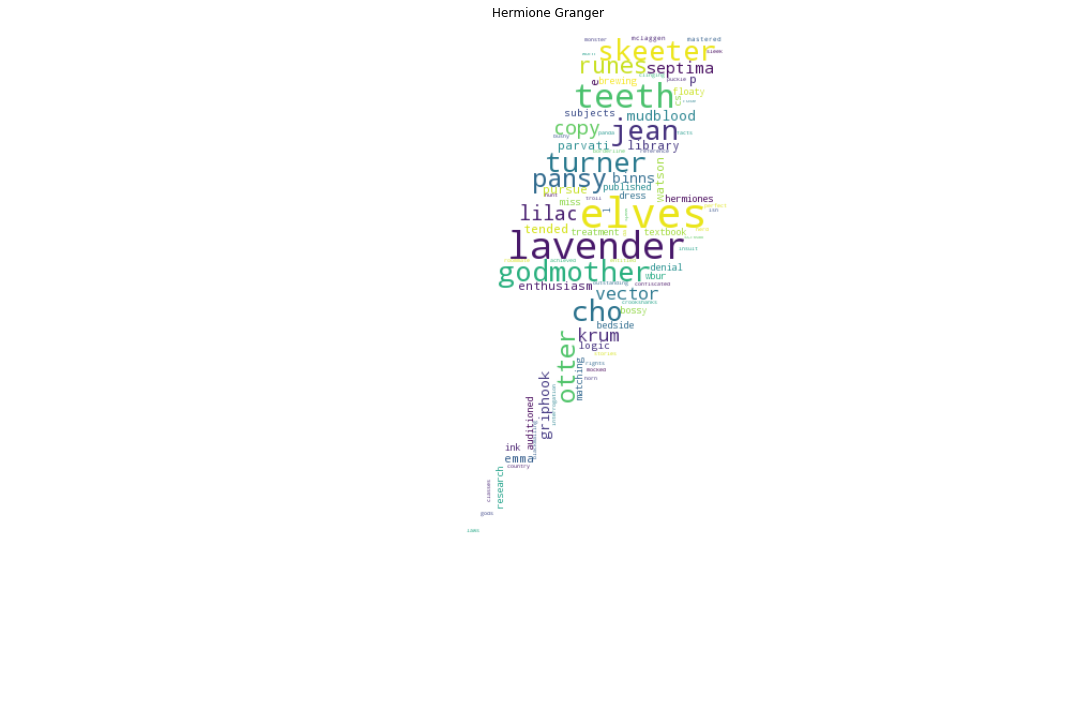

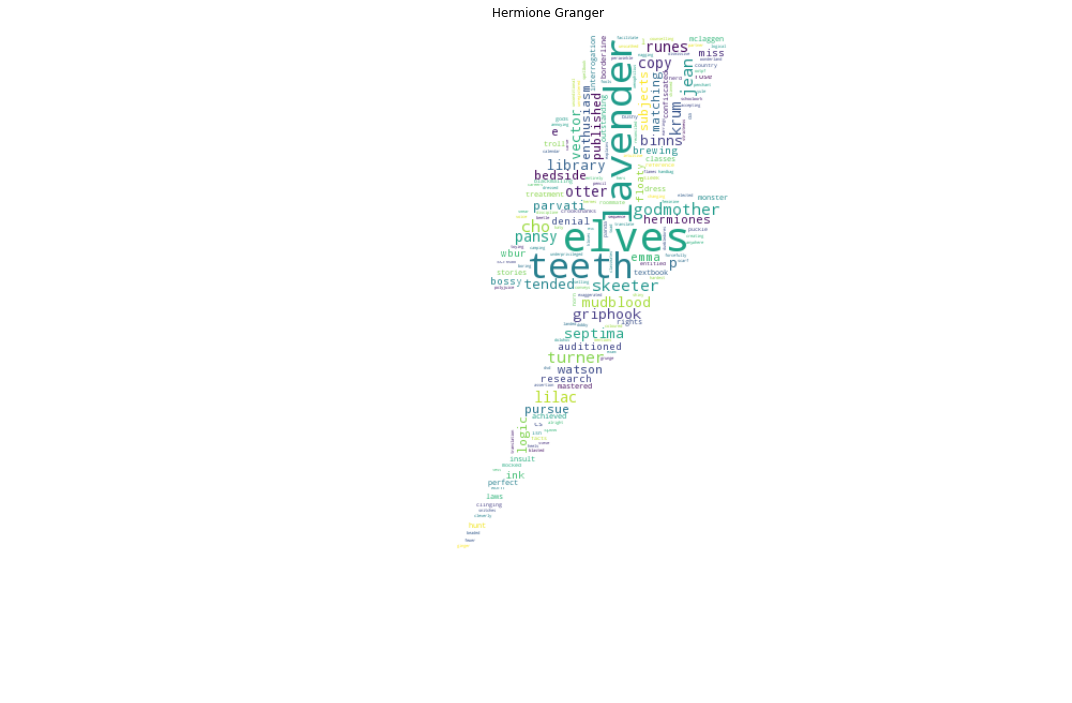

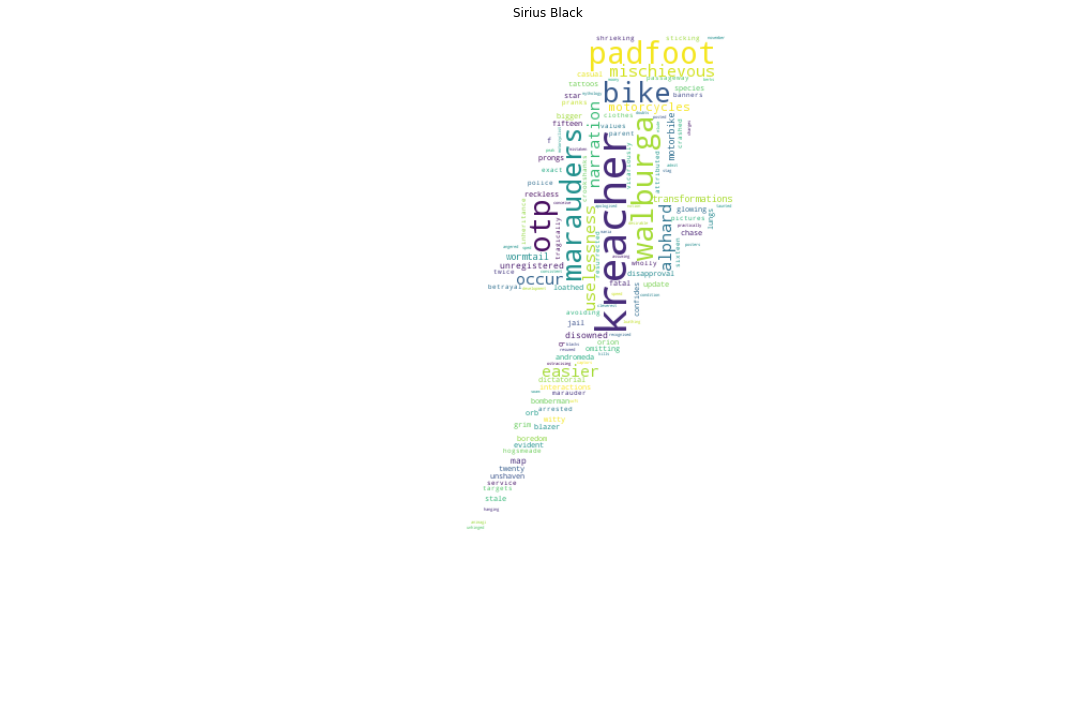

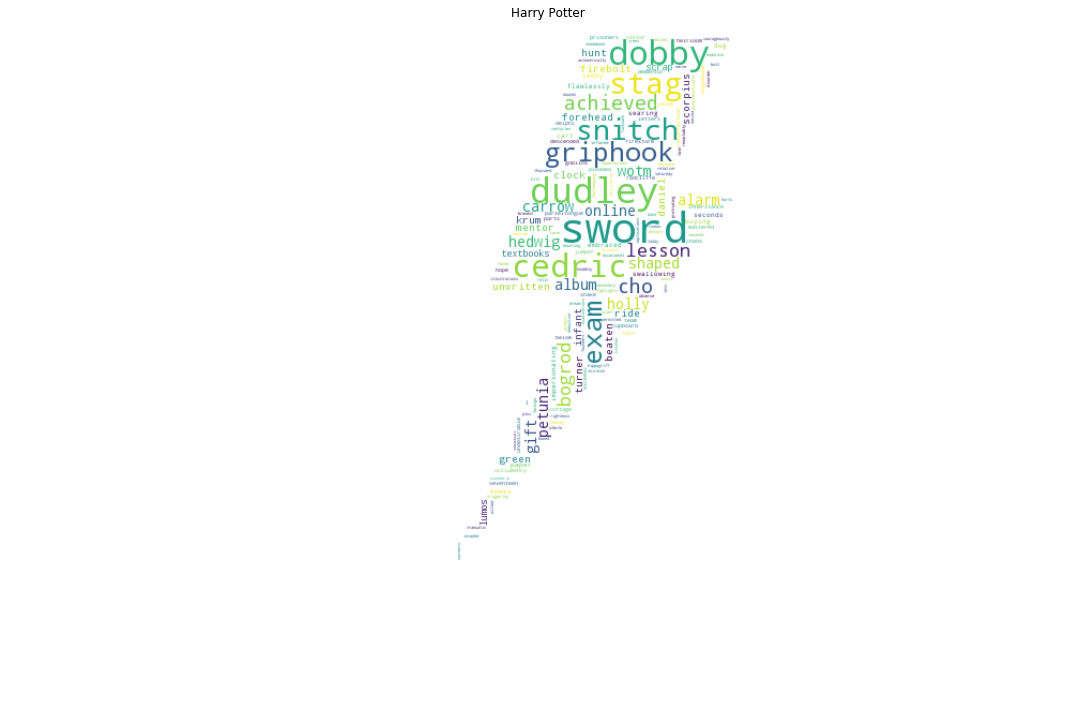

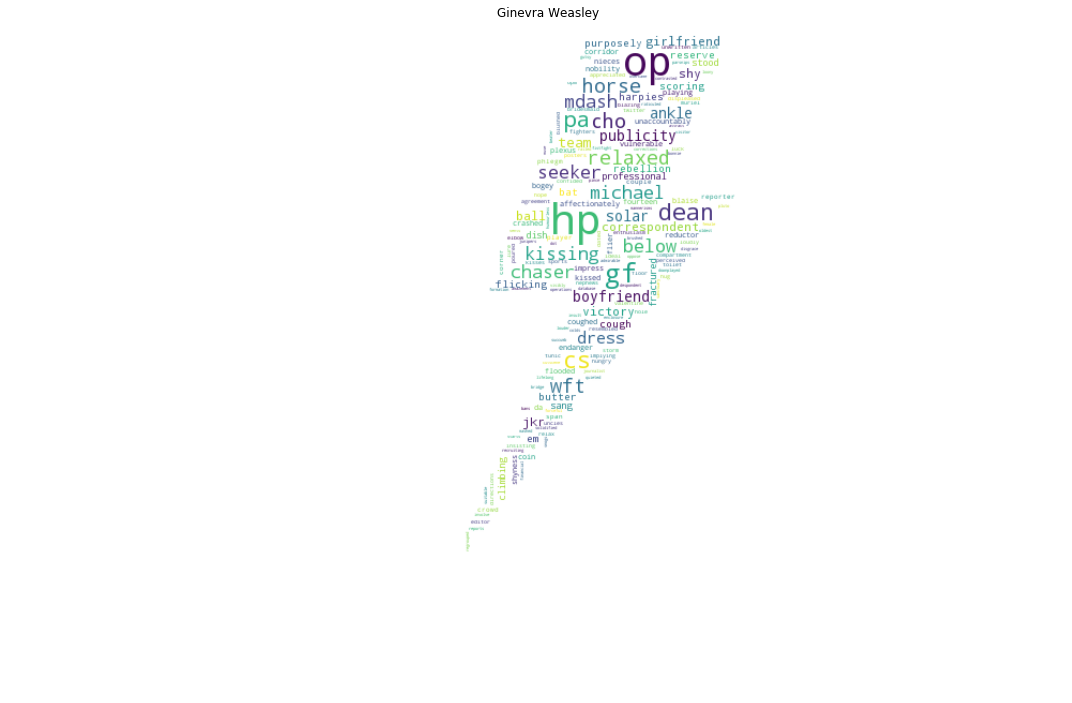

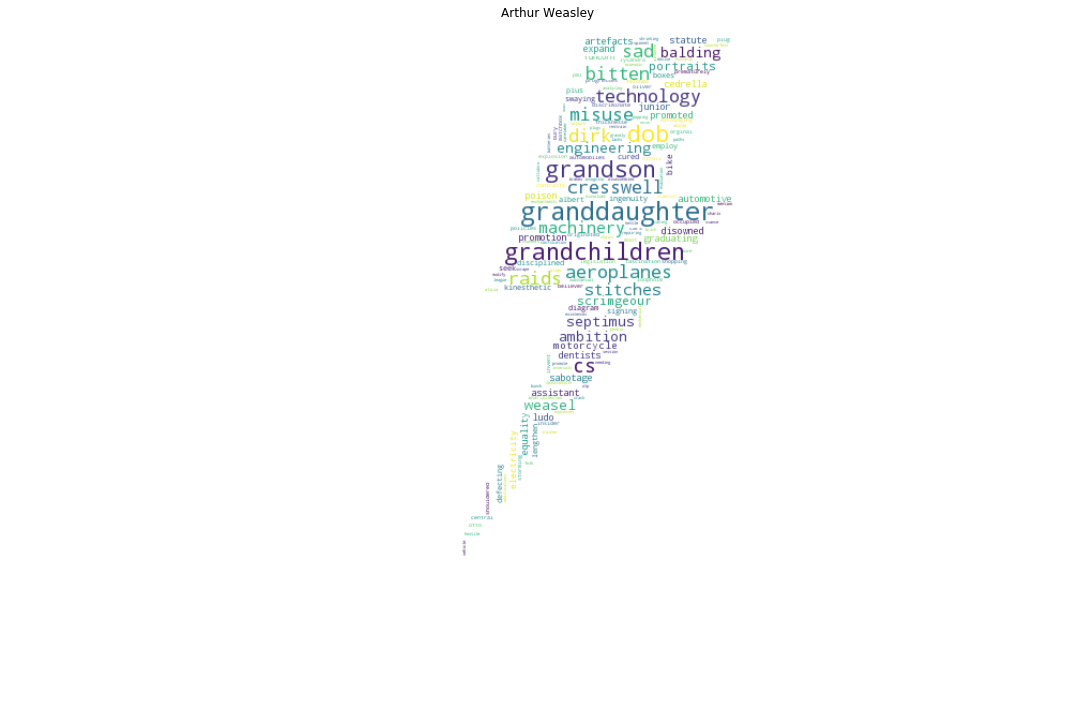

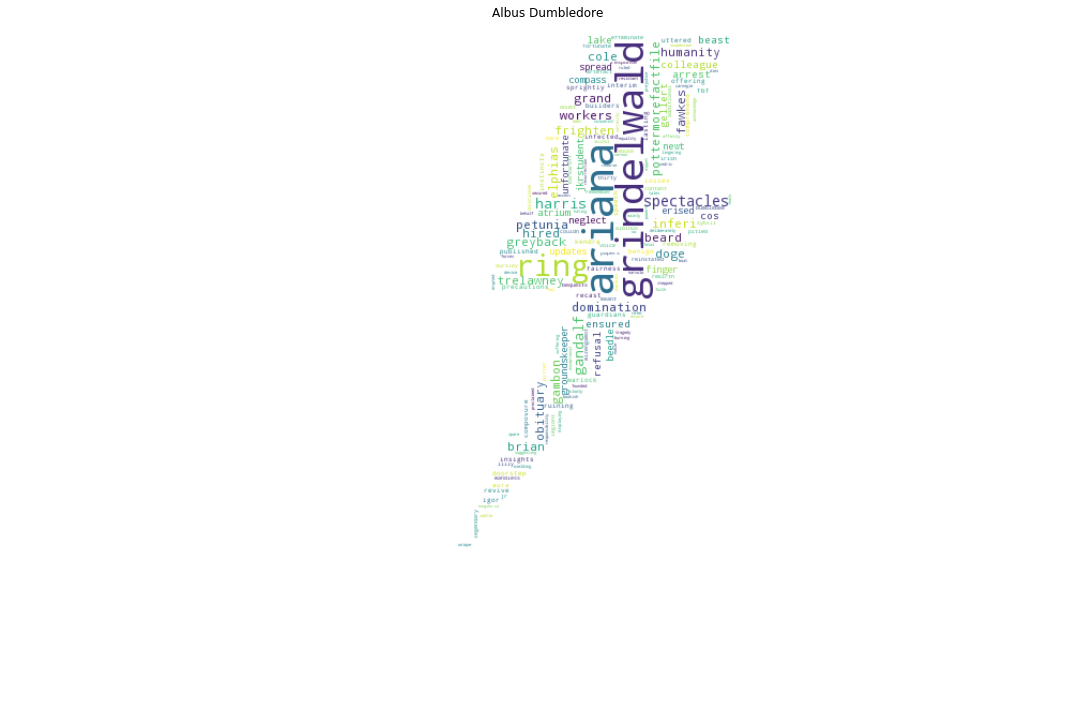

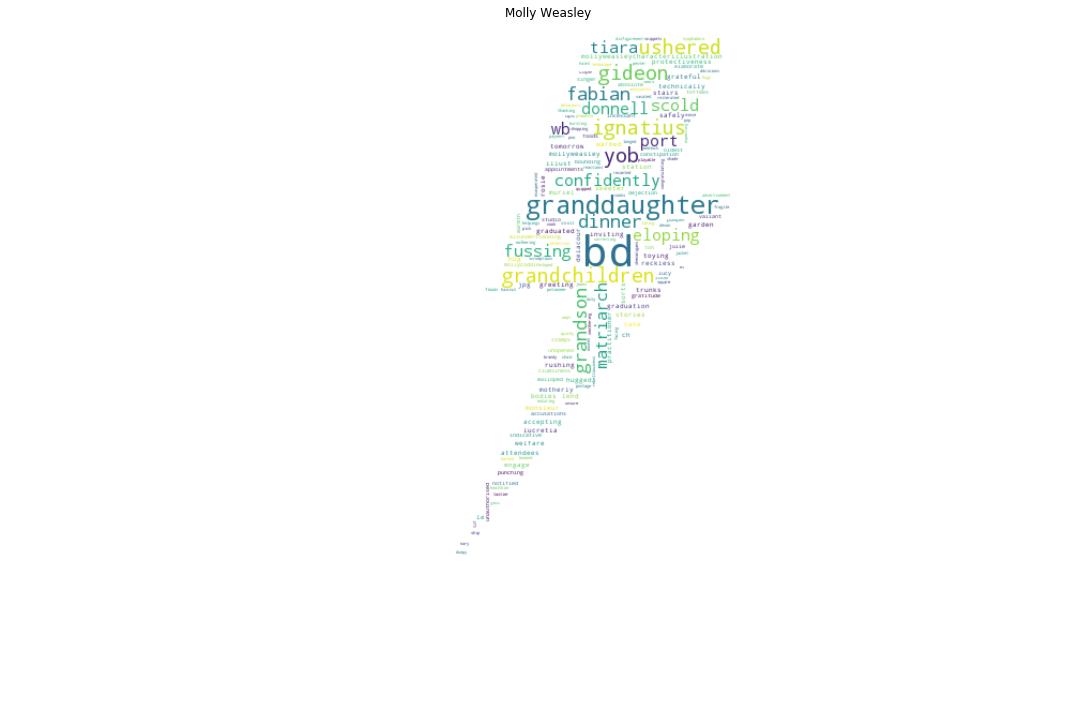

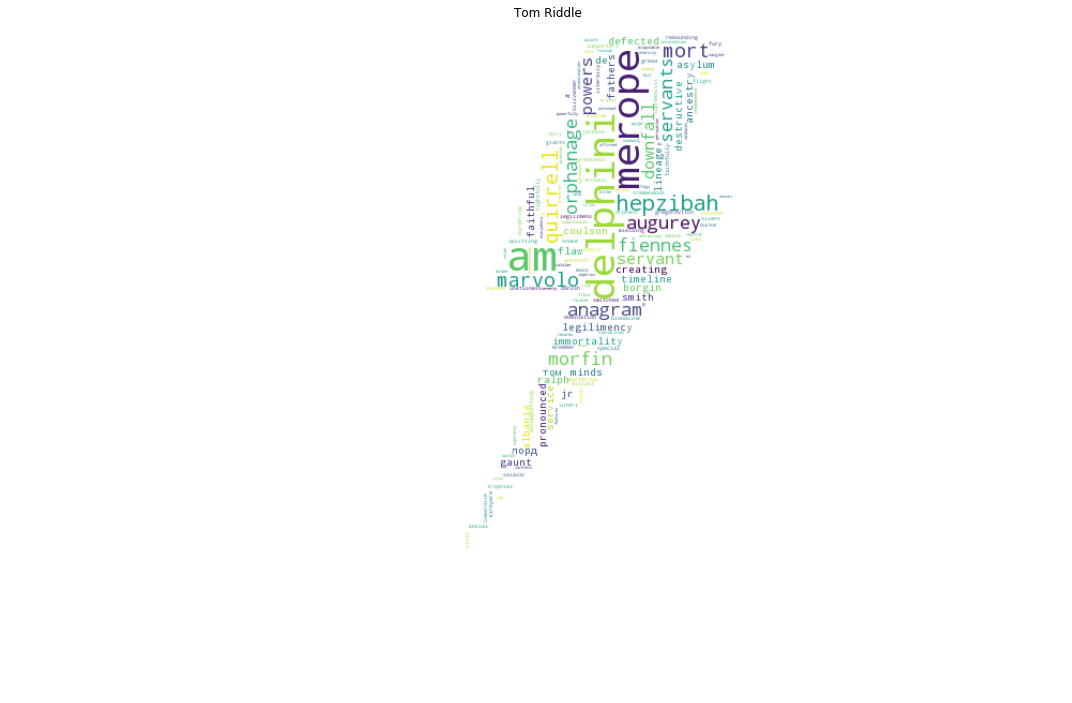

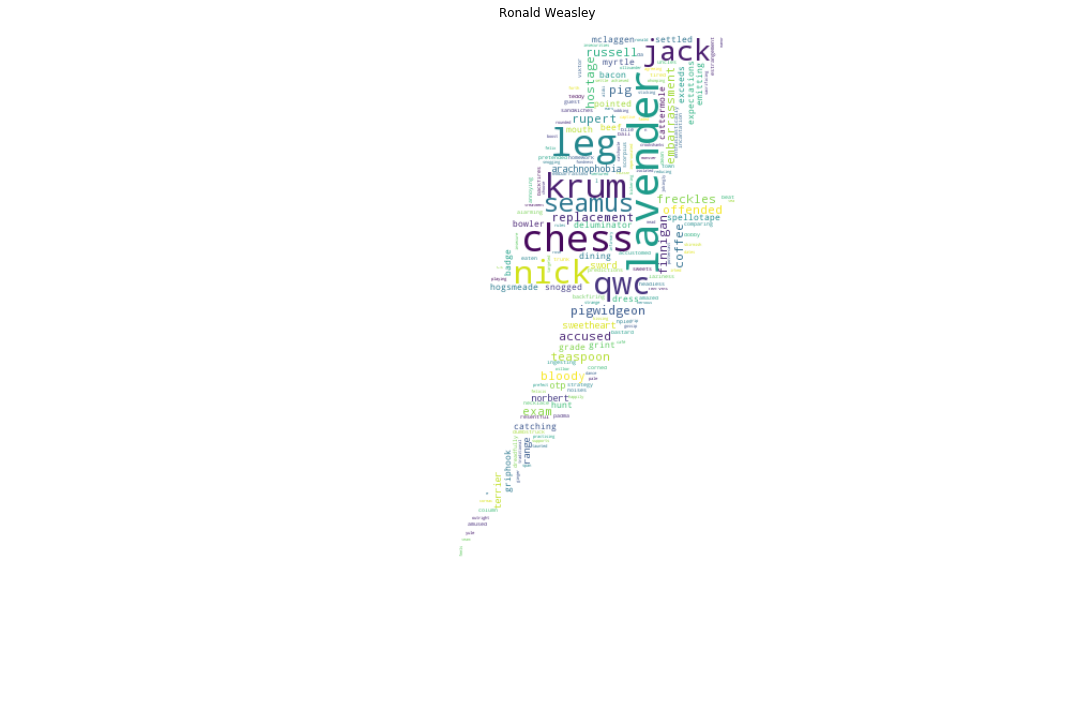

In [37]:
createWordCloud(tfidf_dict,'Hermione Granger')
createWordCloud(tfidf_dict,'Sirius Black')
createWordCloud(tfidf_dict,'Harry Potter')
createWordCloud(tfidf_dict,'Ginevra Weasley')
createWordCloud(tfidf_dict,'Arthur Weasley')
createWordCloud(tfidf_dict,'Albus Dumbledore')
createWordCloud(tfidf_dict,'Molly Weasley')
createWordCloud(tfidf_dict,'Tom Riddle')
createWordCloud(tfidf_dict,'Ronald Weasley')

From the above WordClouds of the top 9 characters by node degree, it is quite clear that for a lot of the highlighted words, these actually identify the characters pretty well and can hence be considered to be unique to that characters Wikipedia page. Unfortunately, the downloaded Wikipedia texts are not completely cleaned resulting in some words which originally stems from HTML or LaTeX code is still included in the WordClouds. This is quite clear from some of the non-main characters where unique words are not that prominent and in this way inflating the importance of some the non meaningful words like 'op',' hp', 'cs', 'wft etc.

All of this happens because of the non-cleaned text which is being analyzed and if the text was completely clean then the TF-IDF score should have been able to find unique words which made sense for each character. This is now shown to be the case when doing the same analysis for the seven different books below. The text downloaded from the books are plain text which is cleaned very nicely meaning that all words included in the analysis actually make sense.

First, extract the text from PDF files as seen below:

In [39]:
os.chdir("C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/Final Project/Books")

tokenizer = RegexpTokenizer(r'\w+')

book_texts = dict()
book_texts['Book1'] = tokenizer.tokenize(textract.process("Book 1.txt"))
book_texts['Book2'] = tokenizer.tokenize(textract.process("Book 2.txt"))
book_texts['Book3'] = tokenizer.tokenize(textract.process("Book 3.txt"))
book_texts['Book4'] = tokenizer.tokenize(textract.process("Book 4.txt"))
book_texts['Book5'] = tokenizer.tokenize(textract.process("Book 5.txt"))
book_texts['Book6'] = tokenizer.tokenize(textract.process("Book 6.txt"))
book_texts['Book7'] = tokenizer.tokenize(textract.process("Book 7.txt"))

Now, calculate the TF-IDF score for each of the books in the corpus of the seven books:

In [40]:
#calculate TF-IDF scores of the books
tfidf_dict = calculateTFIDF(book_texts)

Now compute and plot the WordClouds:

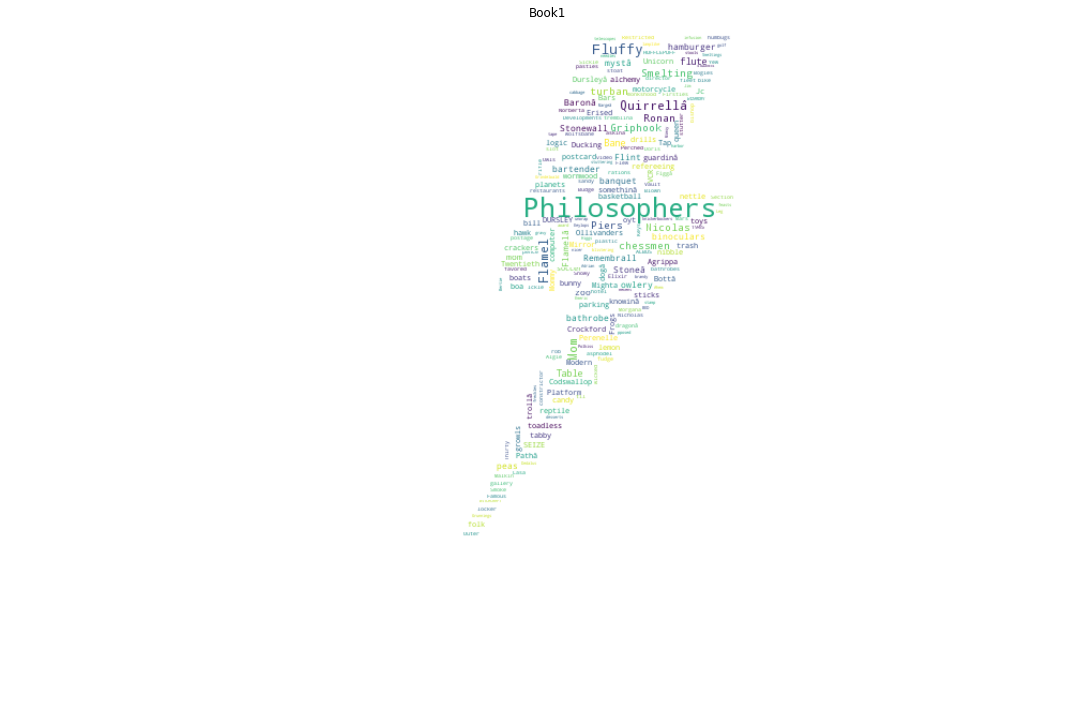

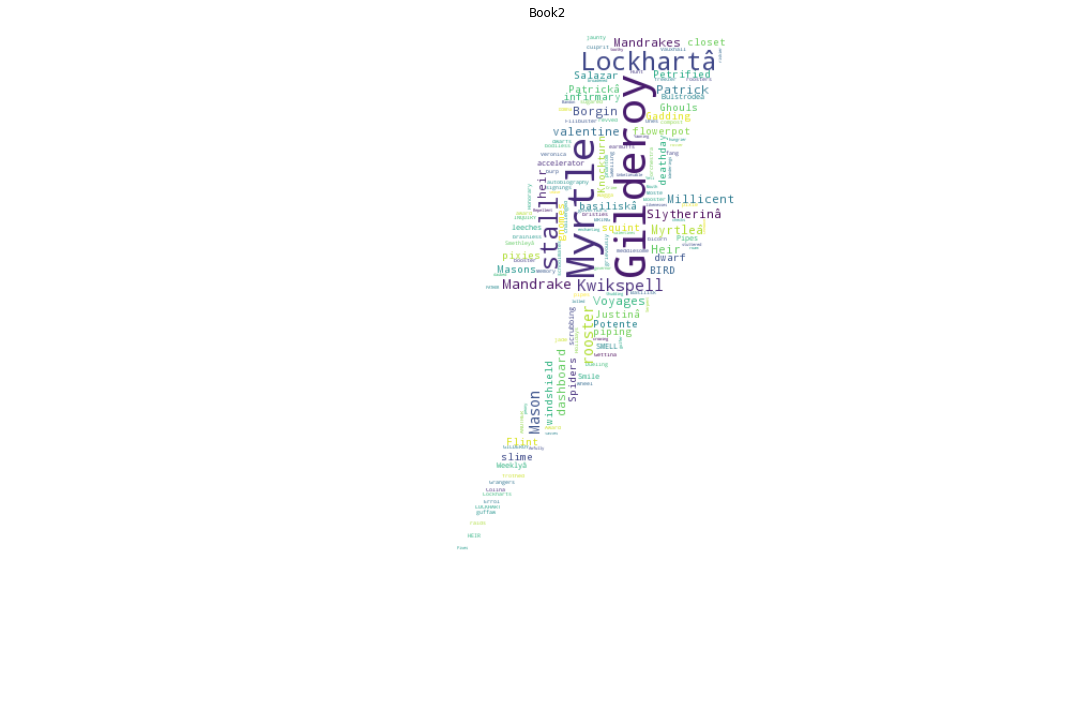

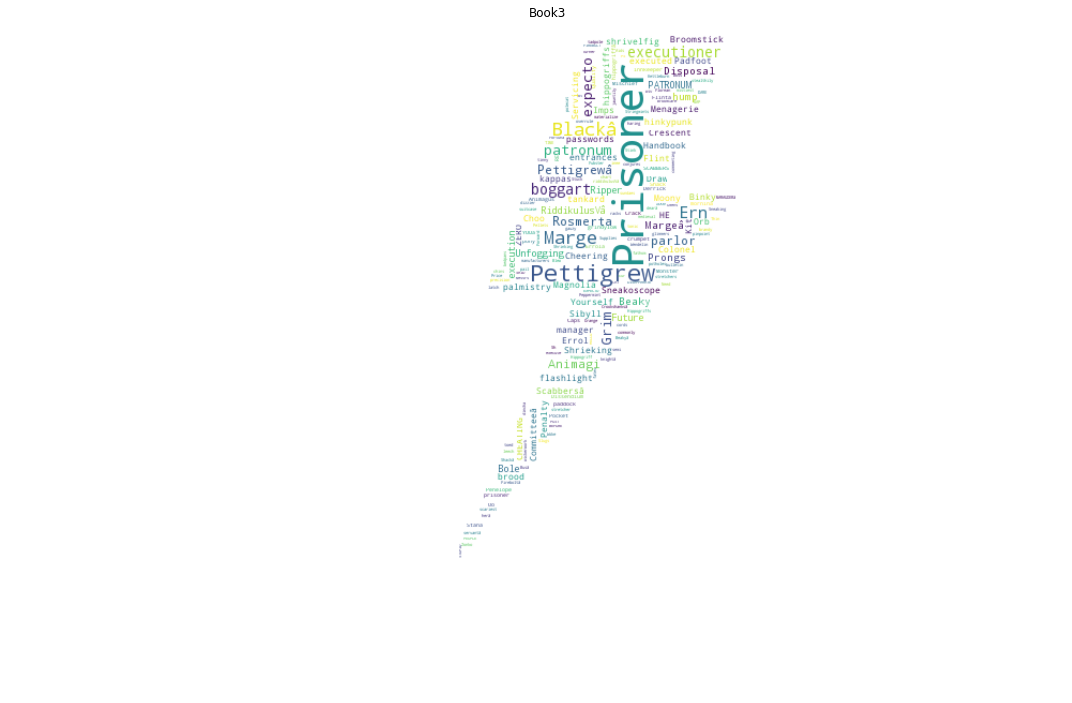

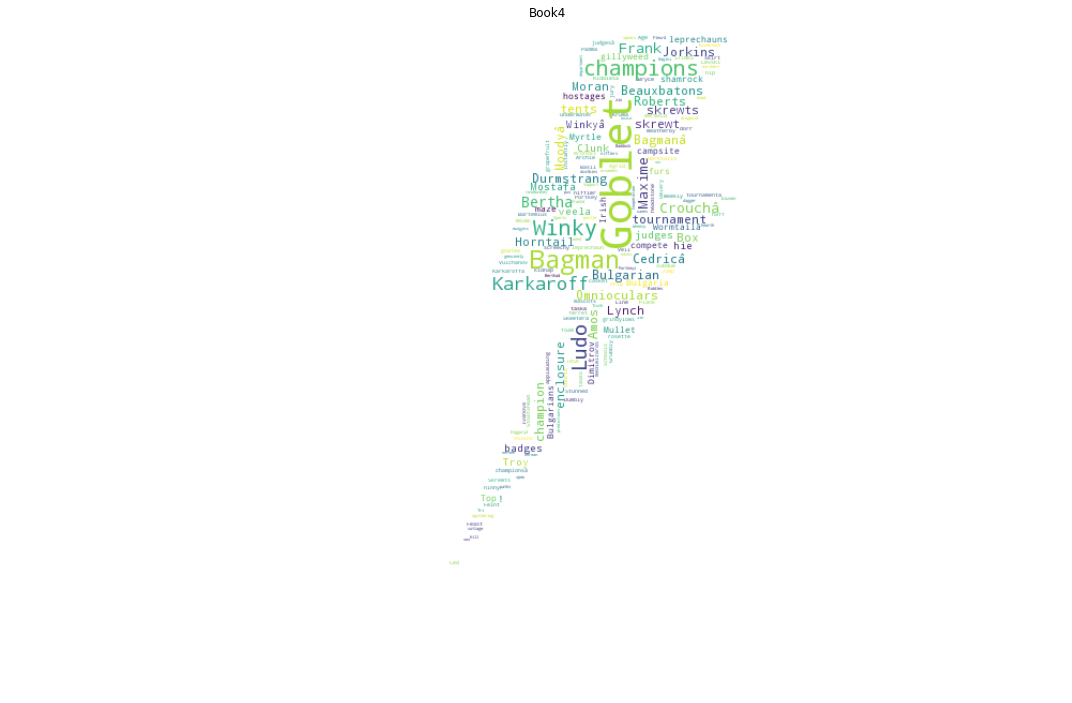

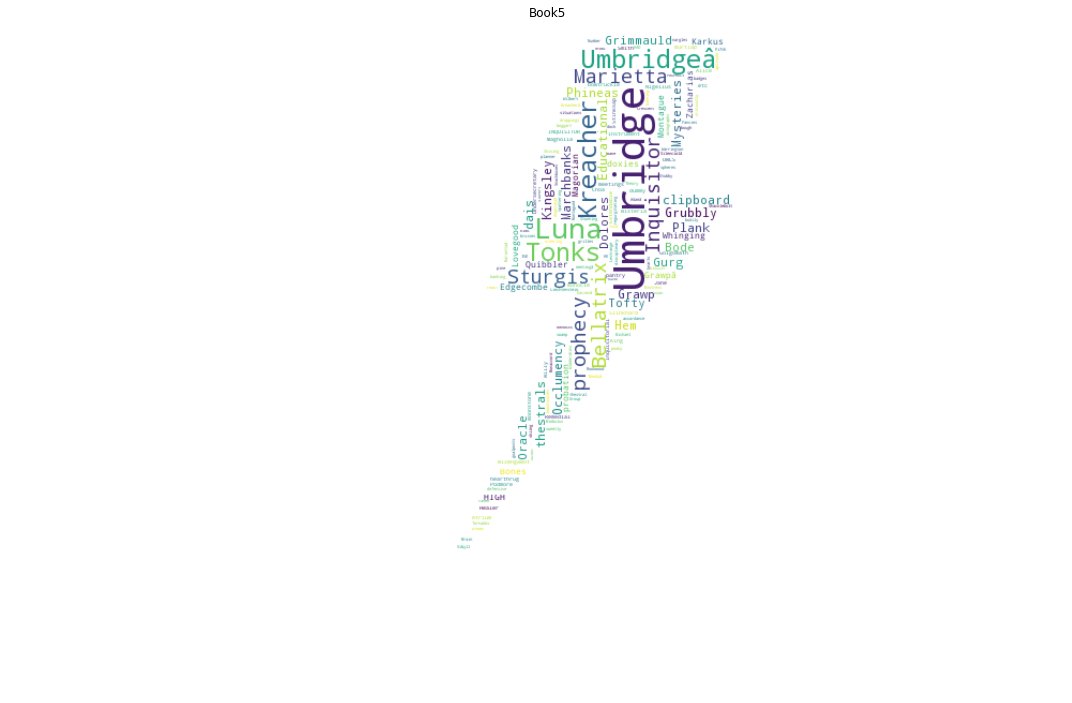

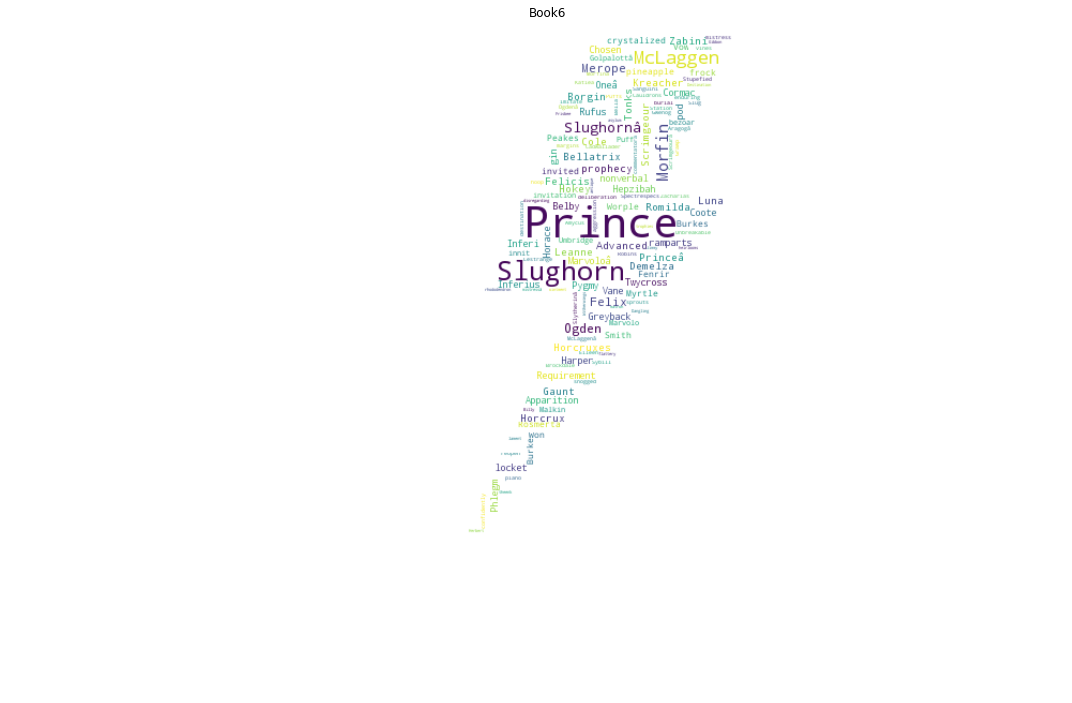

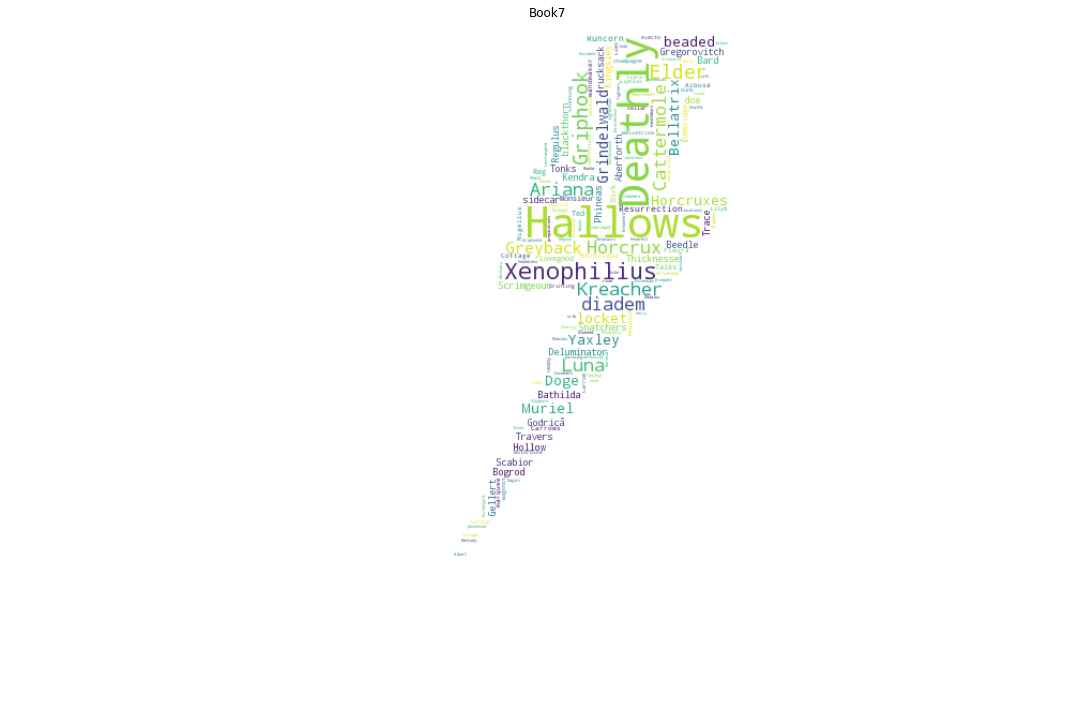

In [41]:
#do wordclouds
createWordCloud(tfidf_dict,'Book1')
createWordCloud(tfidf_dict,'Book2')
createWordCloud(tfidf_dict,'Book3')
createWordCloud(tfidf_dict,'Book4')
createWordCloud(tfidf_dict,'Book5')
createWordCloud(tfidf_dict,'Book6')
createWordCloud(tfidf_dict,'Book7')

From the above, it is quite clear that the TF-IDF did very well in finding unique words for each book. A person with domain knowledge of the books would hence be able to identify with the top words and from this infere why the TF-IDF scoring scheme found this to be unique for this particular book. It is very fascinating and enlightning how a simple procedure of counting occurences of words across a corpus of documents and then applying a mathematical scoring scheme appropriately enables one to do an analysis of such a large amount of text that actually makes sense and that even might point out the unique themes in each book.

Now, it would be interesting to do the same for the movie scripts and then compare the scripts WordClouds to the book WordClouds. The movie scripts are not plain text, but they do not include HTML and LaTeX statements and hence the text is still more clean than the Wikipedia pages. Because of this the WordClouds computed will hopefully only include relevant words. Because we want to compare and analyze the WordClouds of the books and the movies then we concatenate the 7'th and 8'th movie script in to one long text as these both describe then events in the 7'th book.

First, loading the scripts from the files below:

In [42]:
#load the scripts
os.chdir("C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/Final Project/Movies")

movie_scripts = dict()
movie_scripts['Movie1'] = prepare_text(textract.process("Movie 1.txt"))
movie_scripts['Movie2'] = prepare_text(textract.process("Movie 2.pdf"))
movie_scripts['Movie3'] = prepare_text(textract.process("Movie 3.pdf"))
movie_scripts['Movie4'] = prepare_text(textract.process("Movie 4.txt"))
movie_scripts['Movie5'] = prepare_text(textract.process("Movie 5.docx"))
movie_scripts['Movie6'] = prepare_text(textract.process("Movie 6.pdf"))

#concatenate 7'th and 8'th movie into one script
temp_7 = prepare_text(textract.process("Movie 7.pdf"))
temp_8 = prepare_text(textract.process("Movie 8.pdf"))
temp_7.extend(temp_8)
movie_scripts['Movie78'] = temp_7


Calculating the TF-IDF score:

In [43]:
#calculate TF-IDF scores
tfidf_dict = calculateTFIDF(movie_scripts)

Creating the WordClouds:

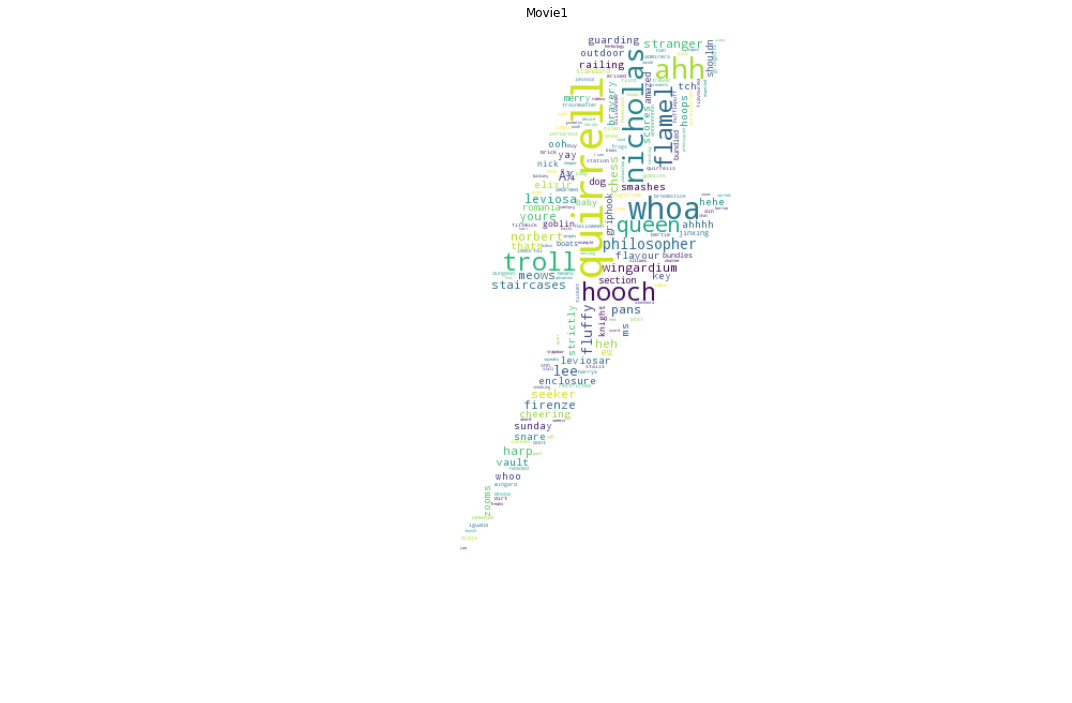

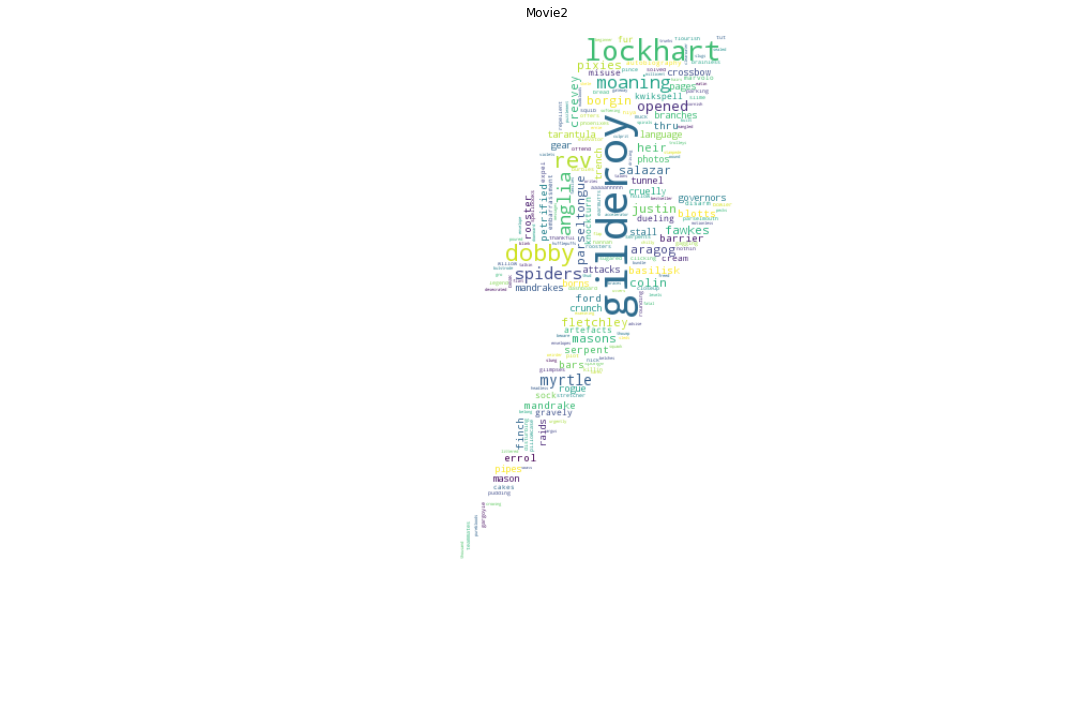

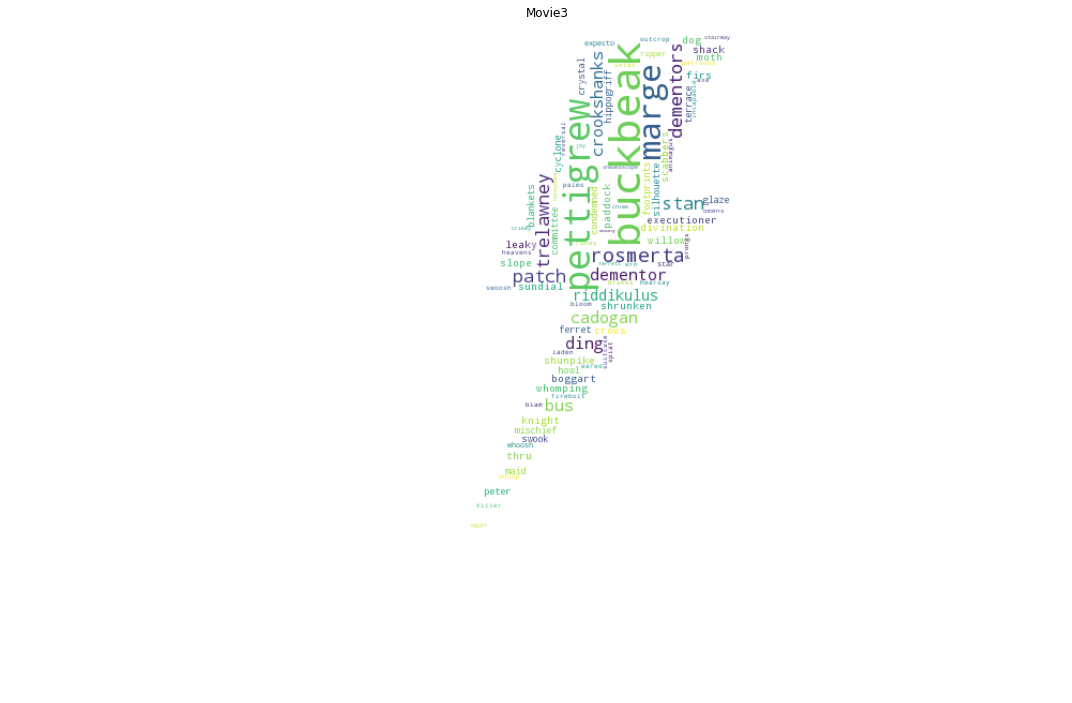

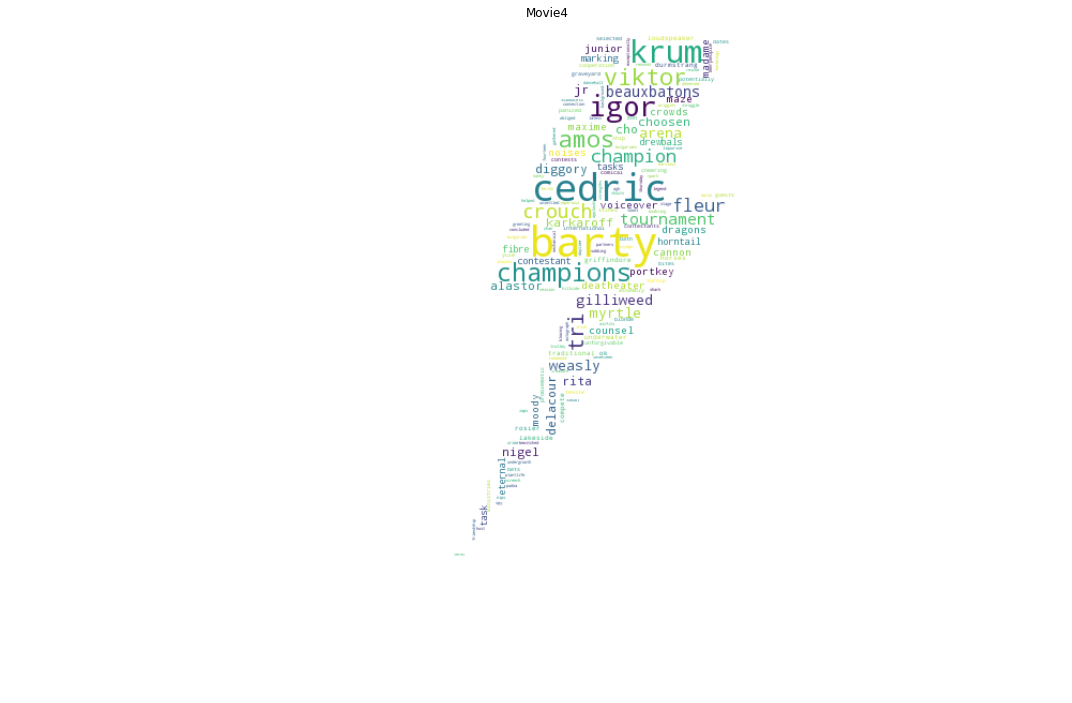

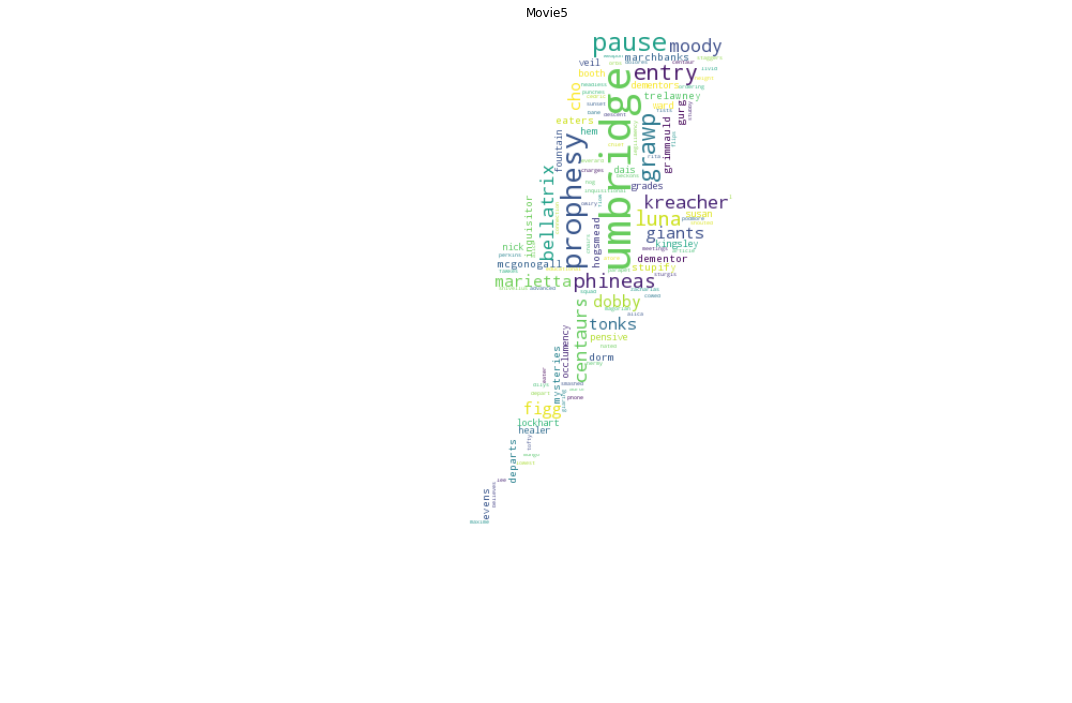

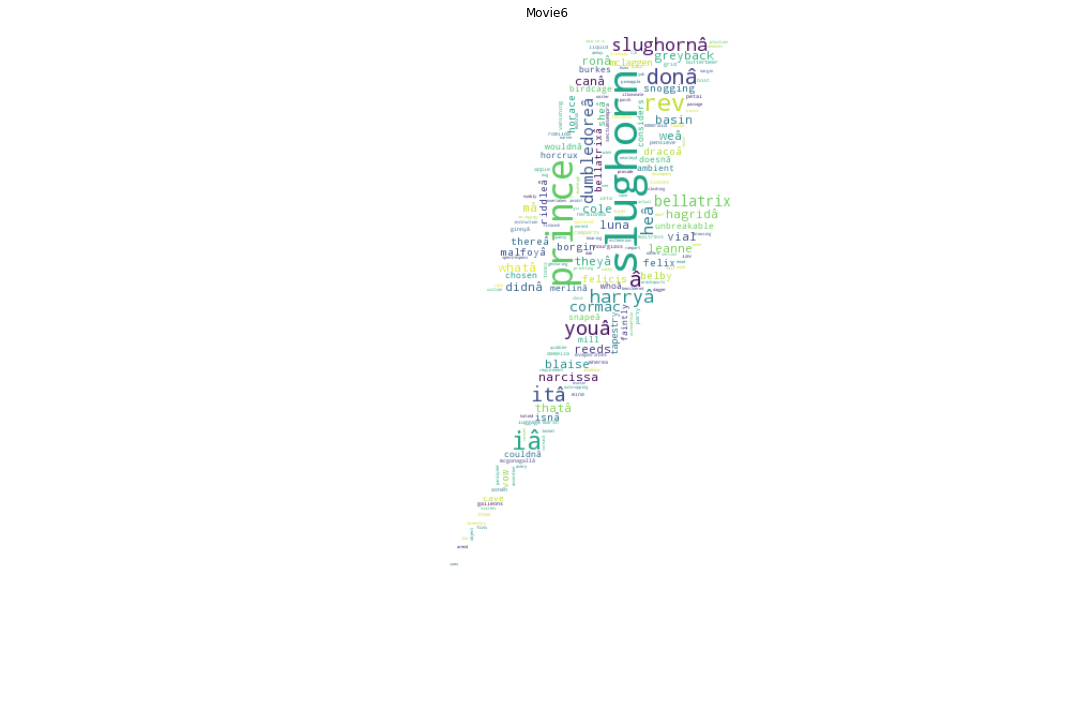

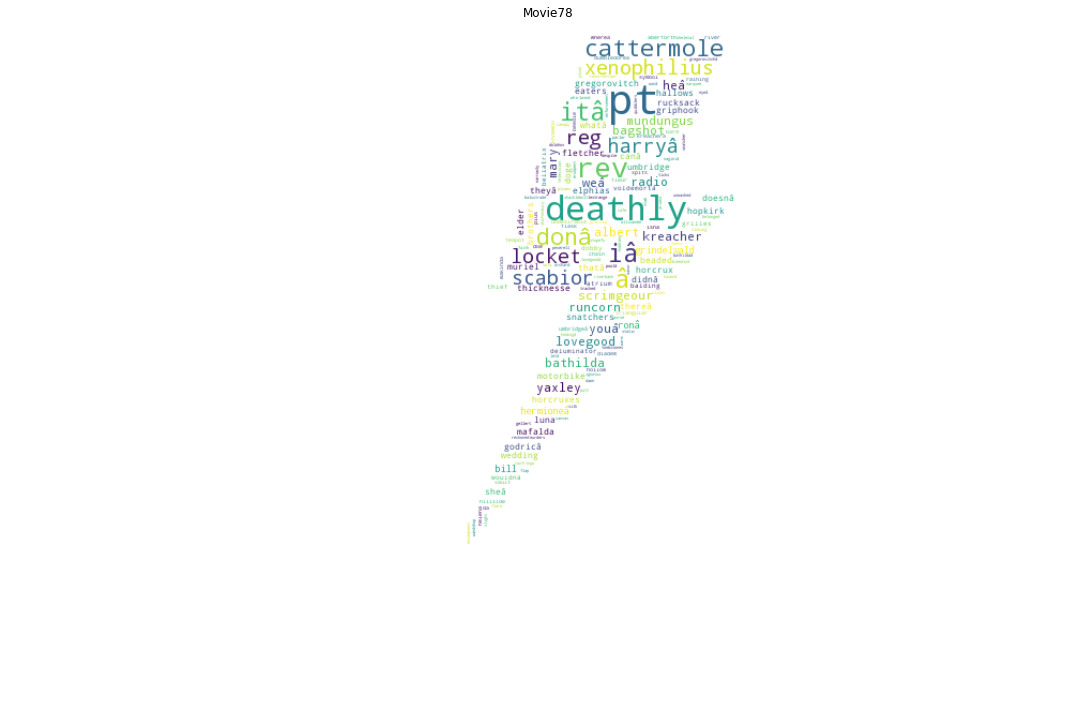

In [44]:
#do wordclouds
createWordCloud(tfidf_dict,'Movie1')
createWordCloud(tfidf_dict,'Movie2')
createWordCloud(tfidf_dict,'Movie3')
createWordCloud(tfidf_dict,'Movie4')
createWordCloud(tfidf_dict,'Movie5')
createWordCloud(tfidf_dict,'Movie6')
createWordCloud(tfidf_dict,'Movie78')

From the above it is quite clear that the text were not as clean as the book texts and because of this some non-meaningful words are included in the WordClouds. But by ignoring these it is still clear that the WordClouds of the books compare well to those of the movies, albeit the fact that for the movie scripts it seems that there is more emphasis on the unique persons included in each movie and for the books the WordClouds are focused on the events which describe that book. The fact that the WordClouds for the movie scripts highlight specific characters are probably because of the textual structure of the movie scripts, where it is repeated which character is speaking everytime that character is doing so. If then the character is only prominent in one movie script, it is identified as unique for that movie.

# 7 - Using NLTK to investigate spells<a name="spells"></a>

By downloading a list of spells occuring in both the books, movies and video games based on the Harry Potter universe, it would be interesting to investigate and answer some of the following questions; which are the most used spells in each book? How does this compare to the movies? Are all spells in the list used in the book or are most of them made up by movie directors and script writers?

Let's look at the most frequently used spells, read the .txt file List_of_spells:

In [45]:
os.chdir("C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/Final Project")
list_of_spells = pd.read_csv('List_of_spells.txt',sep="\t")

Taking a look at the first five spells in the list which is sorted alphabetically below. It is seen that the list includes the type of the spell, the 'incantation' (how to use the spell) and the resulting effect of the spell.

In [46]:
list_of_spells.head()

Incantation        Type                 Resulting Effect 
0            Aberto       Charm                     Opens objects
1             Accio       Charm                 Summons an object
2          Age Line  Enchanment  Hides things from younger people
3         Aguamenti       Charm           Shoots water from wand.
4  Alarte Ascendare       Spell     Shoots things high in the air

First, we investigate which of the spells occur most in the books only and from this it can then also be identified how many of the spells were actually made up in the movies and video games.

By concatenating all books into a single list it can be counted how many times each of these spells occur:

In [47]:
#lower all words
all_books = []
for k,v in book_texts.items():
    all_books.extend(v)
all_books = [word.lower().strip() for word in all_books]
all_books = ' '.join(all_books)

Count occurences of each spell:

In [48]:
spell_count = dict()
for k,spell in enumerate(list_of_spells['Incantation']):
    spell_count[spell] = all_books.count(spell.lower().strip())

Sort and print the top 10 spells:

In [49]:
top_spells = sorted(spell_count.iteritems(), key=operator.itemgetter(1), reverse=True)[:10]
print_dataframe(top_spells,['Spell','Counts'])

Spell  Counts
1           Apparate     122
2   Expecto Patronum      34
3              Accio      34
4            Stupefy      27
5       Expelliarmus      27
6      Avada Kedavra      22
7              Lumos      22
8         Riddikulus      18
9            Imperio      15
10            Crucio      15

Now, find the description/effect of the top 10 spells:

In [50]:
#create dataframe of top spells with descriptions
top_spells_exp = list()
for spell in top_spells:
    index = list(list_of_spells['Incantation']).index(spell[0])
    effect = list_of_spells.iloc[index,2]
    top_spells_exp.append((spell[0],effect))

#print the dataframe
print_dataframe(top_spells_exp,['Spell','Description'])

Spell                                   Description
1           Apparate                           Teleportation Spell
2   Expecto Patronum     Creates a Patronus � A Defensive Guardian
3              Accio                             Summons an object
4            Stupefy                           Knocks out opponent
5       Expelliarmus                         Disarms your opponent
6      Avada Kedavra               Murders opponent � Unforgivable
7              Lumos                     Creates light at wand tip
8         Riddikulus  Use this spell and laugh to defeat a boggart
9            Imperio              Controls a person � Unforgivable
10            Crucio              Tortures opponent � Unforgivable

From the above table it is easily seen that some of the top spells in the book are the unforgiveable spells which either kills, tortures or controls a person. Furthermore, a lot of defensive spells are used a lot indicating that generally the Harry Potter universe is about defending yourself against the darker forces.

Now, how many of the spells only occur in the movies and/or video games?
This is answered by inspecting the spells which had zero counts in the list.

In [51]:
zero_count_spells = [spell for spell,count in spell_count.items() if count == 0]
print '{} spells from the list was not mentioned in any of the books'.format(len(zero_count_spells))
print 'This corresponds to {} percent of the spells in the list.'.format(round(100*float(len(zero_count_spells))/len(spell_count.keys()),2))

82 spells from the list was not mentioned in any of the books
This corresponds to 43.62 percent of the spells in the list.


Nearly half of the spells mentioned in either the movies or the video games were made up and did not exist in the books! This is quite significant and shows how much more there is to the Harry Potter universe which was not present initially in the books.

Let's take a look at how the top 10 spells are used throughout the series of the books. First count occurences of the top spells in each of the seven books.

In [52]:
spell_book_count = dict()

for spells in top_spells:
    temp_dict = dict()
    for k,v in book_texts.items():
        text_prepped = [word.lower() for word in v]
        temp_dict[k] = ' '.join(text_prepped).count(spells[0].lower())
    spell_book_count[spells[0]] = temp_dict

Now make a line plot that shows the development of the top spells throughout the books:

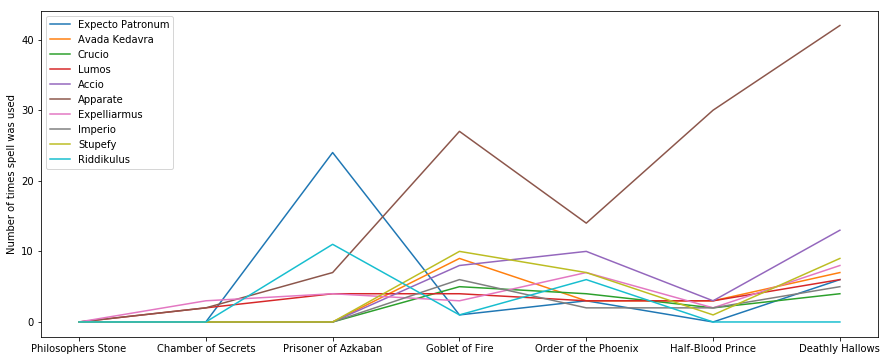

In [53]:
#make the plot
titles = ['Philosopher''s Stone','Chamber of Secrets','Prisoner of Azkaban','Goblet of Fire','Order of the Phoenix','Half-Blood Prince','Deathly Hallows']
plt.figure(figsize=(15,6))
for spell,dictio in spell_book_count.items():
    plt.plot(range(1,8),dictio.values())
    
plt.xticks(range(1,8), titles)
plt.ylabel('Number of times spell was used')
plt.legend(spell_book_count.keys())
plt.show()

Now let's try to investigate the same just this time let's look at the development of spell usage in the movies, only looking at the top 10 spells as before:

In [54]:
spell_movie_count = dict()

for spells in top_spells:
    temp_dict = dict()
    for k,v in movie_scripts.items():
        text_prepped = [word.lower() for word in v]
        temp_dict[k] = ' '.join(text_prepped).count(spells[0].lower())
    spell_movie_count[spells[0]] = temp_dict

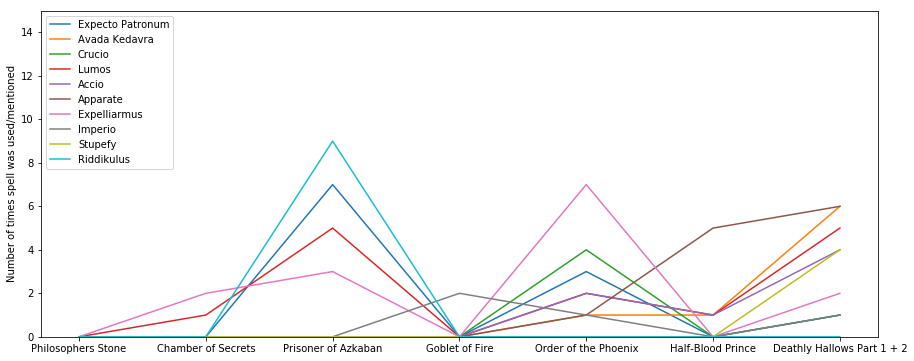

In [55]:
#make the plot
titles = ['Philosopher''s Stone','Chamber of Secrets','Prisoner of Azkaban','Goblet of Fire','Order of the Phoenix','Half-Blood Prince','Deathly Hallows Part 1 + 2']
plt.figure(figsize=(15,6))
for spell,dictio in spell_movie_count.items():
    plt.plot(range(1,8),[dictio['Movie1'],dictio['Movie2'],dictio['Movie3'],
                         dictio['Movie4'],dictio['Movie5'],dictio['Movie6'],dictio['Movie78']])
    
plt.xticks(range(1,8), titles)
plt.ylabel('Number of times spell was used/mentioned')
plt.legend(spell_movie_count.keys(),loc = 2)
axes = plt.gca()
axes.set_ylim([0,15])
plt.show()

From the above it is quite clear that similar patterns exist in the book as in the movies although in the movies it seems that generally the most frequent spells are used less. In correspondence with the books, none of the top 10 spells were used in the first movie and also in the third movie, Expecto Patronum was used a lot. It is clear that in movie 3 the Riddikulus spell was the most often used, where in the book it was the second most used spell. Again, it is clear that the death spell Avada Kedavra is used most frequently towards the end of the series and tops in the 7'th book and 7 and 8'th movie. Interestingly it is already mentioned in the fourth book but in the movies it was first used in the fifth movie. A person with domain knowledge of the Harry Potter universe can easily identify with the above analysis and by this validate the results appropriately. If one was to rate the spells with regards to sentiment, an interesting analysis could potentially be conducted and the result would probably be that towards the end of the books the usage of spells with low sentiment increases and from this conclude that the Harry Potter books and movies becomes darker with time!

# In depth text analysis of the books and movie scripts<a name="text"></a>

In this section we dwelve even deeper in the world of Harry Potter where we use extensive text mining to find interesting features of the books and movies. We start by investigating collocations in the different books. Collocations are a collection of words that occur frequently in a document and hence gives a description of the book in a small sentence or collection of words.

First collect all books and movie scripts into two lists:

In [56]:
#save them to a list
books = book_texts.values()

#save them to a list
movies = movie_scripts.values()

Create a list containing the titles of all Harry Potter books and movies.

In [57]:
titles=["Harry Potter and the Philosopher's Stone",
"Harry Potter and the Chamber of Secrets",
"Harry Potter and the Prisoner of Azkaban",
"Harry Potter and the Goblet of Fire",
"Harry Potter and the Order of the Phoenix",
"Harry Potter and the Half-Blood Prince",
"Harry Potter and the Deathly Hallows"
]

Now, using the nltk package and the collocations function to investigate collocations in each book as seen below:

In [58]:
for i in range(7):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    Book = books[i]
    Book = [unicode(word, errors='ignore') for word in Book]
    Book = nltk.Text(Book)
    print titles[i]
    Book.collocations()
    print "\n"

Harry Potter and the Philosopher's Stone
Philosophers Stone; Harry Potter; Uncle Vernon; Professor McGonagall;
Aunt Petunia; said Ron; said Hagrid; said Harry; Privet Drive;
Invisibility Cloak; common room; Nimbus Two; Great Hall; Two Thousand;
Mrs Dursley; Madam Pomfrey; Mrs Norris; Leaky Cauldron; Madam Hooch;
Nicolas Flamel


Harry Potter and the Chamber of Secrets
Harry Potter; Professor McGonagall; said Ron; Uncle Vernon; Mrs
Weasley; said Harry; Nearly Headless; Headless Nick; Madam Pomfrey;
Aunt Petunia; Moaning Myrtle; Gilderoy Lockhart; Sorting Hat; Mrs
Norris; hospital wing; Great Hall; common room; Professor Sprout; said
Hermione; Dark Arts


Harry Potter and the Prisoner of Azkaban
Harry Potter; Uncle Vernon; Professor McGonagall; Professor Trelawney;
Professor Lupin; said Ron; said Harry; Aunt Marge; Madam Pomfrey;
common room; said Hermione; Invisibility Cloak; said Lupin; Sirius
Black; Dark Arts; hospital wing; Mrs Weasley; Aunt Petunia; Madam
Hooch; Great Hall


Harry P

From the above it is quite clear that some of the collocations like 'said Harry', 'said Hermione' etc are consequences of the fact the analysis is done on a plain text book where sentences are presented with a trailing 'said character'. Furthermore, it is seen that the collocations include a lot of names and this would be a good identifier of a single book if that person would only occur in that book but its use is limited when collocations like 'Harry Potter' show in every book. Although this is the case it is also seen that some collocations are explaining the themes of the books but to know this a person needs domain knowledge of the Harry Potter universe.

Now, we want to investigate the relashionship between the three main characters Harry, Ron and Hermione and see if we could have predicted whether Harry or Ron would be Hermione's boyfriend. For non Harry Potter fans we can reveal that Ron and Hermione end of as a couple. For that reason, we created a list of lists where each sublist contains the trigrams, a continuous sequence of three words which are next to each other, for each book respectively and then, we counted the occurences of the following trigrams;  "Harry and Hermione", "Harry and Ron" and "Ron and Hermione". Finally, we plotted our results.

In [59]:
list_of_lists_trigrams=[] #initialize an empty list
for i in range(7):
    list_of_trigrams=[] #initialize an empty list
    tokenizer = nltk.RegexpTokenizer(r'\w+')  #create a tokenizer
    Book = books[i] #tokenize the book text
    Book = [unicode(word, errors='ignore') for word in Book] #convert to utf-8 
    Book = nltk.Text(Book) #save the text
    trigrams = ngrams(Book,3) #use function ngrams to create trigrams
    for item in trigrams:
        list_of_trigrams.append(item) #append trigrams to a list
    list_of_lists_trigrams.append(list_of_trigrams) #append trigrams list to a list of lists

In [60]:
dict_relashionship={} #initialize an empty dictionary
for i in range(7):
    counter_of_trigrams=Counter(list_of_lists_trigrams[i]) #count the trigrams occurances
   
    #fill the dictionary with the number of each trigram's occurances
    if i==0:
        dict_relashionship["Harry and Hermione"]=[counter_of_trigrams[('Harry','and','Hermione')]]
        dict_relashionship["Harry and Ron"]=[counter_of_trigrams[('Harry','and','Ron')]]
        dict_relashionship["Ron and Hermione"]=[counter_of_trigrams[('Ron','and','Hermione')]]
    else:
        dict_relashionship["Harry and Hermione"].append(counter_of_trigrams[('Harry','and','Hermione')])
        dict_relashionship["Harry and Ron"].append(counter_of_trigrams[('Harry','and','Ron')])
        dict_relashionship["Ron and Hermione"].append(counter_of_trigrams[('Ron','and','Hermione')])
        

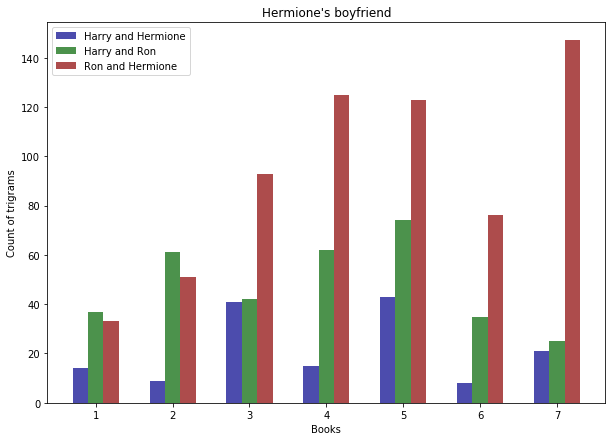

In [61]:
savePath = 'C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/socialgraphs/img'
# create the bar plot
index = np.arange(7) #set the indexes
width = 0.2 #set the width of the bars

plt.figure(figsize=(10,7)) #set the figure size

#create bars for Harry and Hermione
r1 = plt.bar(index, dict_relashionship["Harry and Hermione"], width,
                 alpha=0.7,
                 color='darkblue',
                 label="Harry and Hermione") 

#create bars for Harry and Ron 
r2 = plt.bar(index + width, dict_relashionship["Harry and Ron"], width,
                 alpha=0.7,
                 color='darkgreen',
                 label="Harry and Ron")

#create bars for Hermione and Ron 
r3 = plt.bar(index + 2*width, dict_relashionship["Ron and Hermione"], width,
                 alpha=0.7,
                 color='darkred',
                 label="Ron and Hermione")

# set title and x,y labels
plt.xlabel('Books')
plt.ylabel('Count of trigrams')
plt.title('Hermione\'s boyfriend')
#set the position of the xticks
plt.xticks(index + width, ('1', '2', '3', '4', '5', '6', '7'))
plt.legend() #add legend
plt.savefig(os.path.join(savePath,'hermiones_boyfriend.png'),dpi=400)
plt.show()

From the above it is quite clear that already from the third book, the trigram 'Ron and Hermione' was very trending and hence it could be that J. K. Rowling had already planned that Ron and Hermione should have ended up together. Although this might be unclear it is quite clear that Ron and Hermione are mentioned together a lot more than 'Harry and Ron' and 'Harry and Hermione'.

Next, we are interested on the courses the characters talk about the most in each book. Our approach was similar to the one before. This time we counted the occurances of "Dark Arts" using bigrams and we also counted the occurances of Potions, Transfiguration and Quidditch. Finally, we plotted the results.

In [62]:
dict_courses={} #initialize an empty dictionary
for i in range(7):
    tokenizer = nltk.RegexpTokenizer(r'\w+') #create a tokenizer
    Book = books[i] #tokenize the book text
    Book = [unicode(word, errors='ignore') for word in Book] #convert to utf-8 
    Book = nltk.Text(Book) #save the text
    digrams = ngrams(Book,2) #use function ngrams to create digrams
    
    #fill the dictionary with the number bigram's occurances
    if i==0:
        dict_courses["Defence Again the Dark Arts"]=[Counter(digrams)[('Dark','Arts')]]
    else:
        dict_courses["Defence Again the Dark Arts"].append(Counter(digrams)[('Dark','Arts')])

In [63]:
for i in range(7):
    tokenizer = nltk.RegexpTokenizer(r'\w+') #create a tokenizer
    Book = books[i] #tokenize the book text
    Book = [unicode(word, errors='ignore') for word in Book] #convert to utf-8 
    Book = nltk.Text(Book) #save the text
   
    #fill the dictionary with the number of each course occurances
    if i==0:
        dict_courses["Potions"]=[Counter(Book)[('Potions')]]
        dict_courses["Transfiguration"]=[Counter(Book)[('Transfiguration')]]
        dict_courses["Quidditch"]=[Counter(Book)[('Quidditch')]]
    else:
        dict_courses["Potions"].append(Counter(Book)[('Potions')])
        dict_courses["Transfiguration"].append(Counter(Book)[('Transfiguration')])
        dict_courses["Quidditch"].append(Counter(Book)[('Quidditch')])

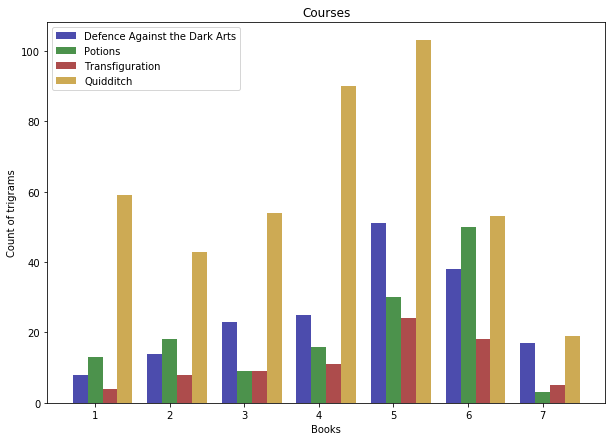

In [64]:
# create bar plot
index = np.arange(7) #set the indexes
width = 0.2 #set the width of the bars


plt.figure(figsize=(10,7)) #set the figure size


#create bars for Defence Again the Dark Arts
r1 = plt.bar(index, dict_courses["Defence Again the Dark Arts"], width,
                 alpha=0.7,
                 color='darkblue',
                 label="Defence Against the Dark Arts")

#create bars for Potions
r2 = plt.bar(index + width, dict_courses["Potions"], width,
                 alpha=0.7,
                 color='darkgreen',
                 label="Potions")

#create bars for  Transfiguration
r3 = plt.bar(index + 2*width, dict_courses["Transfiguration"], width,
                 alpha=0.7,
                 color='darkred',
                 label="Transfiguration")

#create bars for Quidditch
r4 = plt.bar(index + 3*width,dict_courses["Quidditch"], width,
                 alpha=0.7,
                 color='darkgoldenrod',
                 label="Quidditch")

# set title and x,y labels 
plt.xlabel('Books')
plt.ylabel('Count of trigrams')
plt.title('Courses')
#set the position of the xticks
plt.xticks(index + width, ('1', '2', '3', '4', '5', '6', '7'))
plt.legend() #add legend
plt.savefig(os.path.join(savePath,'count_courses.png'),dpi=400)
plt.show()

From the above it is quite clear that Quidditch is very popular throughout the whole series but seem to drop a lot towards the end and especially in the last book. Remembering that in the last book Hogwarts is under attack by Voldemort and his army this might be expected that a fun activity like Quidditch is less prominent. Furthermore courses like 'Potions' and 'Defence against the Dark Arts' become more prominent towards the end of the series and from this we conclude that these courses are more advanced courses which are taken by the older students and hence become popular with the aging of Harry Potter and his friends.

Furthermore, we created some dispersion plots for the most important characters and also for the four housing of Hogwarts to investigate the usage of the words throughout the whole series of books.

In [65]:
#create a list of all words in the books and movies
words = []
for book in books:
    words.extend(book)
words_movies = []
for movie in movies:
    words_movies.extend(movie)

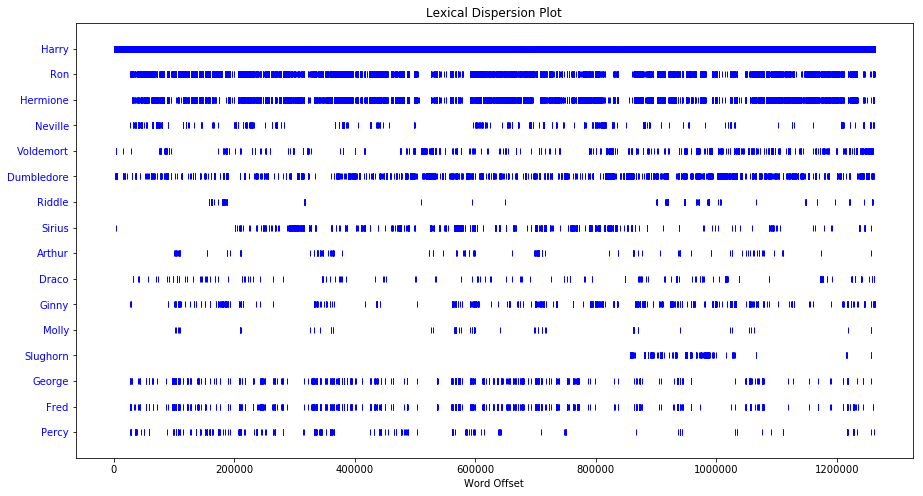

In [66]:
#dispersion plot for the most important characters from the text of the books
from nltk.draw.dispersion import dispersion_plot
plt.figure(figsize=(15,8)) #set figure size
dispersion_plot(words,["Harry","Ron", "Hermione","Neville","Voldemort","Dumbledore","Riddle","Sirius","Arthur","Draco","Ginny","Molly","Slughorn","George","Fred","Percy"])
plt.savefig(os.path.join(savePath,'dispersion_characters_book.png'),dpi=400)
plt.show()

From the above it is quite clear that the main characters are mentioned nearly throughout the whole collection of books. Furthermore, it is seen that characters like Slughorn is mentioned very late, which is expected as he was introduced only in the sixth book. Furthermore, it is seen that Voldemort is mentioned more towards the end of the series indicating that people dare to say his name towards the end of the series!

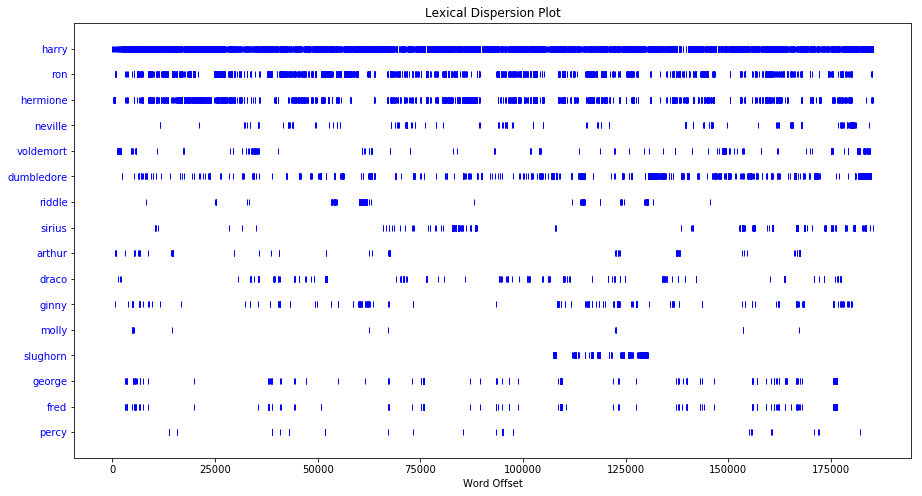

In [67]:
#dispersion plot for the most important characters from the movie scripts
from nltk.draw.dispersion import dispersion_plot
plt.figure(figsize=(15,8))  #set figure size
dispersion_plot(words_movies,["harry","ron", "hermione","neville","voldemort","dumbledore","riddle","sirius","arthur","draco","ginny","molly","slughorn","george","fred","percy"])
plt.savefig(os.path.join(savePath,'dispersion_characters_movie.png'),dpi=400)
plt.show()

The above observations that were made with regards to the dispersion plot for the books seem to also count for the movies. The main characters are prominent throughout the whole book but it is seen that some of the less prominent characters are mentioned less in the movies than in the books which might be an effect of the streamlining of the movie scripts such that a whole book can fit into a 2 hour film.

Now, creating dispersion plots for the four housing of Hogwarts; Gryffindor, Slytherin, Hufflepuff and Ravenclaw.

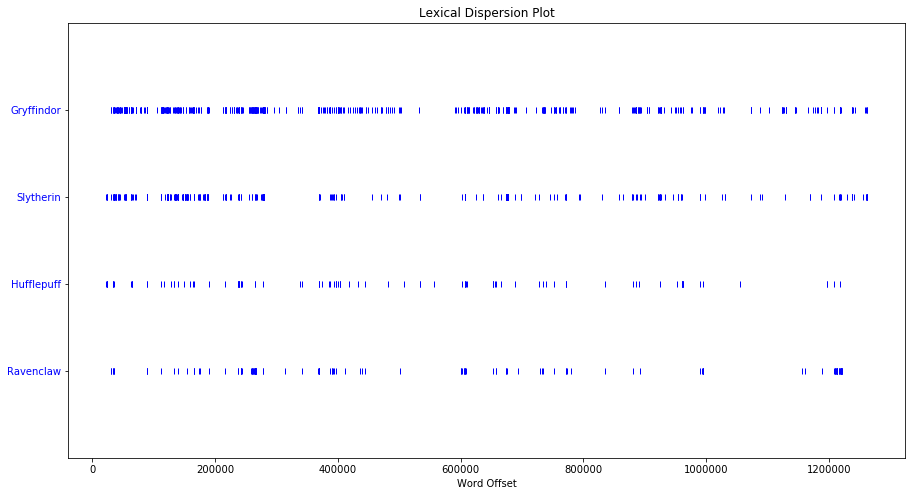

In [68]:
#dispersion plot for the four dorms from the text of the books
plt.figure(figsize=(15,8))  #set figure size
dispersion_plot(words,['Gryffindor','Slytherin','Hufflepuff','Ravenclaw'])
plt.savefig(os.path.join(savePath,'dispersion_housings_book.png'),dpi=400)
plt.show()

From this it is very clear that the most prominent house are the Gryffindor and Sltyherin houses where the Hufflepuff and Ravenclaw houses are not as prominent. This is even more the case when investigating the movie scripts below. Here it is first observe that the names of the houses are mentioned less frequently but it is also seen that Hufflepuff and Ravenclaw is mentioned very few times compared to Gryffindor and Slytherin.

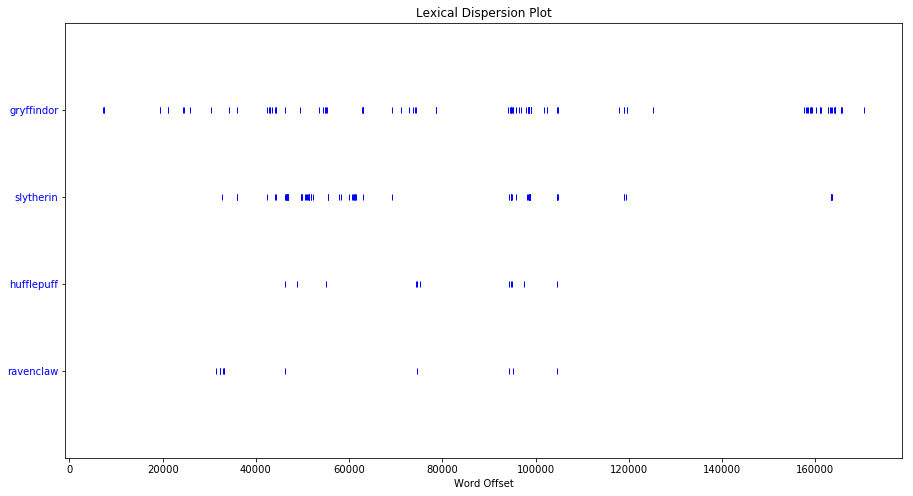

In [69]:
#dispersion plot for the four dorms from the movie scripts
plt.figure(figsize=(15,8)) #set figure size
dispersion_plot(words_movies,['gryffindor','slytherin','hufflepuff','ravenclaw'])
plt.savefig(os.path.join(savePath,'dispersion_housings_movie.png'),dpi=400)
plt.show()

#  8 - LabMT based sentiment analysis <a name="sentiment"></a>

In this section a sentiment analysis of the books and movie scripts are conducted using the LabMT sentiment list of words from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752). The approach here is to organize the LabMT list of words into to a dictionary with their corresponding sentiment as their value. Then by setting a specific window size including the amount of words equal to the window size, then an average of the sentiment of the words in the window is computed and returned by the function CalculateSentiment as is seen below. It should be noted that by setting a window size equal to one, it is possible to rate every single word in the book and by setting a larger window size and then sliding the window across the text then a moving average of the sentiment throughtout the book is obtained.

First, we write a function which takes an amount of tokens equal to the length of the window size and uses the dictionary created from the LabMT word list to compute an average sentiment score of all the tokens:

In [70]:
os.chdir("C:/Users/TerkelBo/OneDrive for Business/7. Semester/Social Graphs and Interactions/Final Project/Books")
def CalculateSentiment(tokens,dictio):    
    count_tokens = Counter(tokens) #frequencies
    tokens = list(set(tokens)) #now only use unique words such that lookup time is reduced
    
    #calculate sentiment score
    numerator = 0    #initialize sum
    denominator = 0  #initialize sum
    for token in tokens:
        try:
            happiness_scores = dictio[token]                   #get average happiness scores
            count = count_tokens[token] 
            numerator += happiness_scores*count                #add to numerator sum
            denominator += count                               #add to denominator sum
        except:
            pass
    
    if denominator == 0: 
        return 'No score computed' #if denominator zero, return string
    

    return numerator/denominator

First we would like to rate each word with a specific sentiment score and from this we create thresholds to categorize words as bad, neutral or good words and we then observe the development throughout the books. First we load all the books into a list of texts as seen below:

In [71]:
with open('LabMT_wordlist.txt') as file_in: #read sentiment file in dict
    rows = [line.split('\t') for line in file_in]
    rows = rows[1:] #dont include the header of the file
    dictio = { row[0]:float(row[2]) for row in rows} #read words as keys and happiness average as value
    
tokenizer = nltk.RegexpTokenizer(r'\w+') #tokenizer to remove puncutation

book1 = textract.process("Book 1.txt")
book2 = textract.process("Book 2.txt")
book3 = textract.process("Book 3.txt")
book4 = textract.process("Book 4.txt")
book5 = textract.process("Book 5.txt")
book6 = textract.process("Book 6.txt")
book7 = textract.process("Book 7.txt")

list_text = [book1, book2, book3, book4, book5, book6, book7]
   

Now, by setting a window size of 1 then all words are given a sentiment score throughout all of the seven books:

In [72]:
windows = [1] #window size 1 => all words are rated
sentiment_dict = dict()

for j,book in enumerate(list_text,1):
    print 'Processing book no. {}'.format(j)
    sentiment_dict['book'+str(j)] = []
    book = tokenizer.tokenize(book) #remove punctuation
    book = [token.lower() for token in book] #lower all tokens
    for window in windows: #loop over windows
        sentiments = []
        for i in range(window-1,len(book)):
            sentiments.append(CalculateSentiment(book[(i-window):i],dictio)) #calculate sentiment for current window and append
        sentiments = [sentiment for sentiment in sentiments if isinstance(sentiment,float)] #remove eventual 'No score' strings
        sentiment_dict['book'+str(j)].append(sentiments) #append the sentiment vector to the current dict value

Processing book no. 1
Processing book no. 2
Processing book no. 3
Processing book no. 4
Processing book no. 5
Processing book no. 6
Processing book no. 7


We now define thresholds as follows; everything under 5 in sentiment is a bad words, every thing from 5 to 5.5 is a neutral word and everything above 5.5 is a good word. From this we create a dictionary of the counts of each of the word classes across all books:

In [73]:
#bin into bad neutral and good.
binned_sentiment = dict()
for k,v in sentiment_dict.items():
    v = np.array(v[0])
    bad_words = (v <= 5).sum()
    neutral_words = ((v > 5) & (v<5.5)).sum()
    good_words = (v >= 5.5).sum()
    binned_sentiment[k] = [bad_words,neutral_words,good_words]

Now, we convert the occurences to percentages such that the increase or decrease in word counts can be observed across all seven books excluding effects of the length of the books:

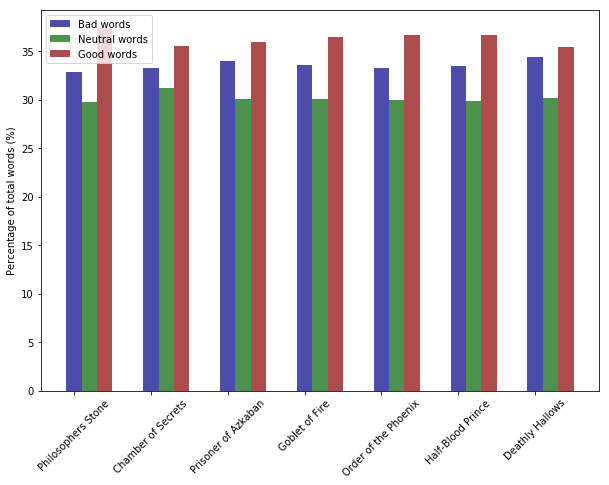

In [74]:
from __future__ import division
plt.figure(figsize=(15,10))
titles = ['Philosopher''s Stone','Chamber of Secrets','Prisoner of Azkaban','Goblet of Fire','Order of the Phoenix','Half-Blood Prince','Deathly Hallows']


# create the bar plot
index = np.arange(7) #set the indexes (books)
width = 0.2 #set the width of the bars

plt.figure(figsize=(10,7)) #set the figure size

bad_words = []
for book in binned_sentiment.keys():
    bad_words.append(binned_sentiment[book][0]/sum(binned_sentiment[book])*100)

#create bars for bad words
r1 = plt.bar(index, bad_words, width,
                 alpha=0.7,
                 color='darkblue',
                 label="Bad words") 

neutral_words = []
for book in binned_sentiment.keys():
    neutral_words.append(binned_sentiment[book][1]/sum(binned_sentiment[book])*100)

#create bars for Harry and Ron 
r2 = plt.bar(index + width, neutral_words, width,
                 alpha=0.7,
                 color='darkgreen',
                 label="Neutral words")

good_words = []
for book in binned_sentiment.keys():
    good_words.append(binned_sentiment[book][2]/sum(binned_sentiment[book])*100)
    
#create bars for Hermione and Ron 
r3 = plt.bar(index + 2*width, good_words, width,
                 alpha=0.7,
                 color='darkred',
                 label="Good words")

# set title and x,y labels
plt.xticks(range(0,7), titles)
plt.ylabel('Percentage of total words (%)')
plt.legend() #add legend
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.savefig(os.path.join(savePath,'word_classification.png'),dpi=400)
plt.show()

From the above plot it is quite clear that mostly 'Good words' are used in the books followed by 'Bad words' and then few neutral words. The low occurences of 'Neutral words' is a consequence of the thresholds which cause the range of sentiment for the 'Neutral words' to be very small. Albeith not significant it is seen that there is a general decrease of 'Good words' throughtout the series of books and a general increase of 'Bad words'. The increase is low but relevant. One would expect the increase to be larger but as a consequence of the length of the books this is not seen. As suggested in the analysis of the spells, it would be interestingly to compute sentiment scores for the spells used and then see the development of sentiment only based on the spell usage. This would however require a scoring of all spells used which we chose not to do in this Final Project.

Next, we want to create some sentiment plots for the Harry Potter books.
First we find and rate every word in both the books and movies, this was done earlier only for the books but are done once again here for reference.

In [75]:
sentiment_list_books = []
for j,book in enumerate(books,1):
    print 'Processing book no. {}'.format(j)
    book = [token.lower() for token in book] #lower all tokens
    for window in windows: #loop over windows
        sentiments = []
        for i in range(window-1,len(book)):
            sentiments.append(CalculateSentiment(book[(i-window):i],dictio)) #calculate sentiment for current window and append
        sentiments = [sentiment for sentiment in sentiments if isinstance(sentiment,float)] #remove eventual 'No score' strings
        sentiment_list_books.append(sentiments) #append the sentiment vector to the current dict value

Processing book no. 1
Processing book no. 2
Processing book no. 3
Processing book no. 4
Processing book no. 5
Processing book no. 6
Processing book no. 7


In [76]:
sentiment_list_movies = []
for j,movie in enumerate(movies,1):
    print 'Processing movie no. {}'.format(j)
    movie = [token.lower() for token in movie] #lower all tokens
    for window in windows: #loop over windows
        sentiments = []
        for i in range(window-1,len(book)):
            sentiments.append(CalculateSentiment(movie[(i-window):i],dictio)) #calculate sentiment for current window and append
        sentiments = [sentiment for sentiment in sentiments if isinstance(sentiment,float)] #remove eventual 'No score' strings
        sentiment_list_movies.append(sentiments) #append the sentiment vector to the current dict value

Processing movie no. 1
Processing movie no. 2
Processing movie no. 3
Processing movie no. 4
Processing movie no. 5
Processing movie no. 6
Processing movie no. 7


Function to calculate moving average.
Found on [Stack Overflow](https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy)

In [77]:
def moving_average(a, n) : 
    result = np.cumsum(a)
    result[n:] = result[n:] - result[:-n]
    return result[n - 1:] / n

Now we create a plotting function where we utilize the above moving average function and hereby creating sentiment profiles with a window size of 5000 words. This corresponds to approximately ten pages of words in the window.

In [78]:
def create_plots(sentiments_list,title): #define the function
    book = moving_average(sentiments_list,5000) #call function moving_average
    plt.plot(book,"darkred") #create the plot 
    plt.title(title) #set the title
    plt.xlabel("Text Position") #xaxis label
    plt.ylabel("Happiness Score") #yaxis label
    plt.savefig(os.path.join(savePath,title.replace(' ','_')+'_sentiment_profile.png'),dpi=400)
    plt.show() 

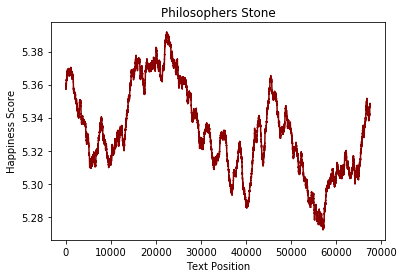

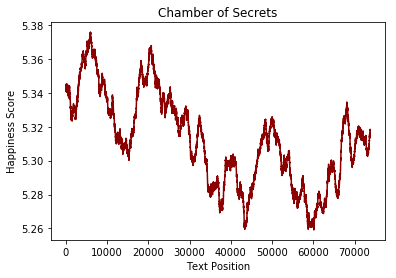

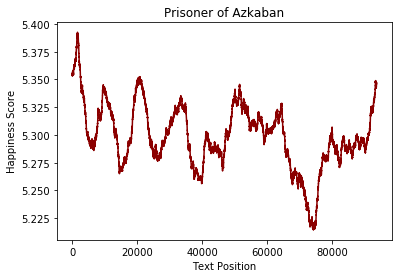

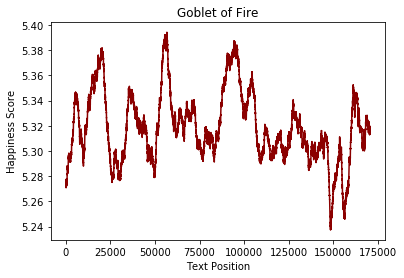

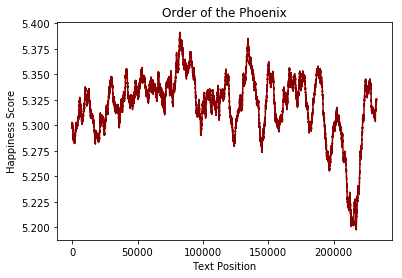

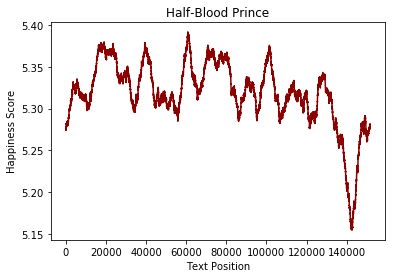

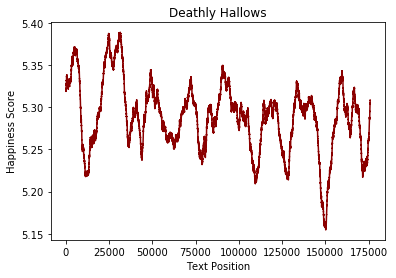

In [79]:
for i in range(7):
    create_plots(sentiment_list_books[i],titles[i])

From the above it is quite clear that fluctuations in the average sentiment exist albeit the fluctuations are not large when comparing to the range on the y-axis. Furthermore, it is not possible to directly identify the events of the books corresponding to the changes in the sentiment profiles except if one was to find and analyze the specific region of interest. As this is a tedious process we move on.

The last part of our sentiment analysis is the creation of some color plots based on the calculated sentiments in order to make a comparison of the sentiments in movies vs in books.

First a function to create color plots.

In [80]:
def create_color_plot(book,movie,title):
    plt.figure(figsize=(18, 1)) #set figure size
    plt.title(title+" Movie") #set plot title
    #create the plot
    movie = moving_average(movie,5000)
    gradient = np.vstack((movie,movie))
    plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap('YlOrBr'))
    plt.savefig(os.path.join(savePath,title.replace(' ','_')+'_sentiment_bar_movie.png'),dpi=400)
    plt.show()
    
    plt.figure(figsize=(18, 1)) #set figure size
    plt.title(title+" Book")  #set plot title
    #create the plot
    book = moving_average(book,5000)
    gradient = np.vstack((book,book))
    plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap('YlOrBr'))
    plt.savefig(os.path.join(savePath,title.replace(' ','_')+'_sentiment_bar_book.png'),dpi=400)
    plt.show() 

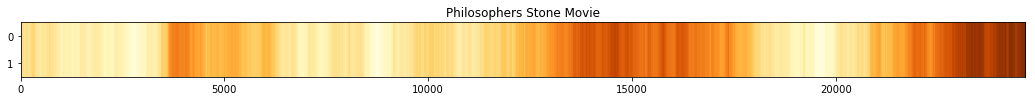

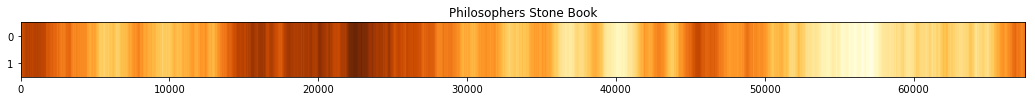

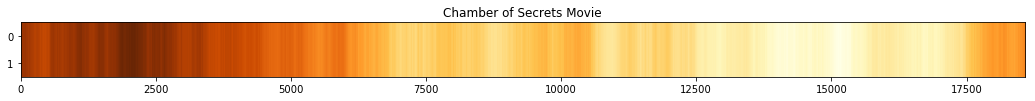

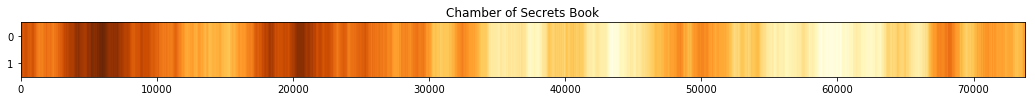

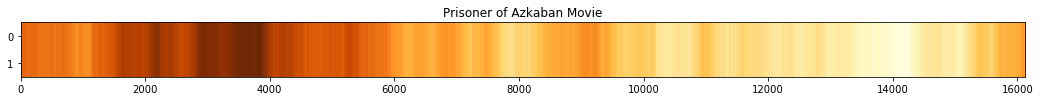

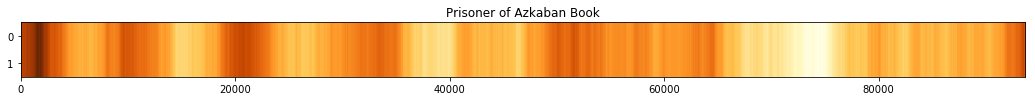

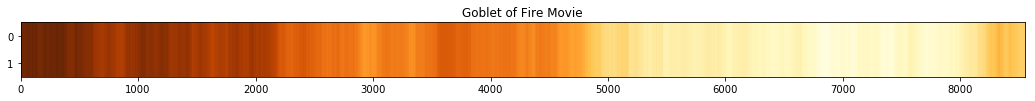

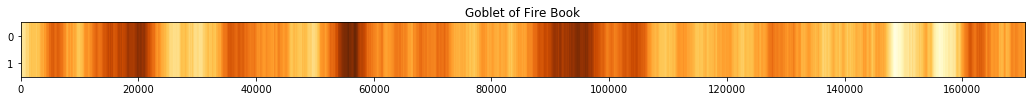

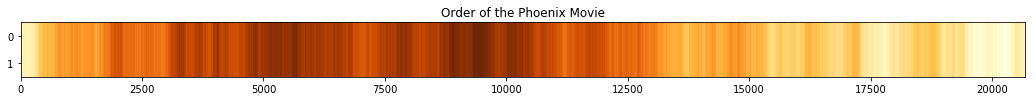

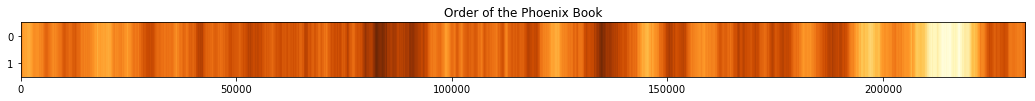

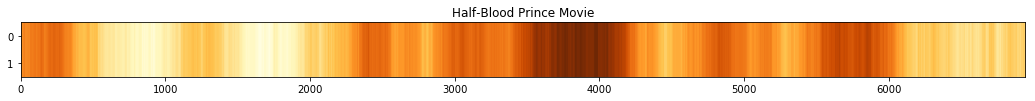

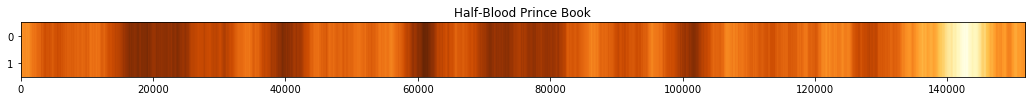

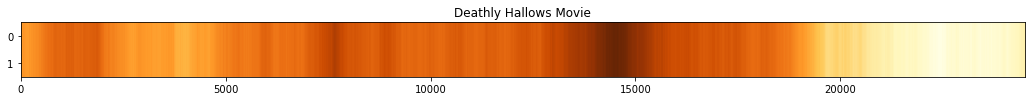

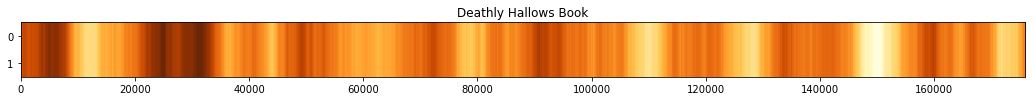

In [81]:
#create color plots for sentiments, movies vs books
for i in range(7):
    create_color_plot(sentiment_list_books[i],sentiment_list_movies[i],titles[i])

From the above it is quite clear that the books and movies differ a lot with respect to their sentiment. A general observation is that in the books the sentiment is more stable than in the movies but overall they seem to match pretty well. As an example it is seen that in the Chamber of secrets books the sentiment is high in the start and lower in the end matching well with the movie script.

# 10 - Discussion and conclusion <a name="discussion"></a>

In this notebook the Harry Potter universe was investigated using network theory, natural language processing and text mining tools and algorithms. A network was constructed by using the Harry Potter Fandom Wikipedia's API and an available XML file was used to find connections between characters by investigating the raw text from their respective Wikipedia sites. A large network of more than 1000 nodes was constructed and then analyzed. It was observed that the network degree follow a power law distribution just like the real social network does. Then the seven Harry Potter books were analyzed and compared to the eight movies. In this analysis we used the TF-IDF procedure to find the most unique words of each book and movie. The results were meaningful and a person with domain knowledge of the Harry Potter universe would easily identify with the found words. Then extensive text mining was performed to find collocations, trigrams and etc. to investigate relationships between characters and the mentioned courses at Hogwarts. Furthermore, it was investigated how the usage of different spells changed throughout the books and movies. Then finally a sentiment analysis was performed, first trying to investigate and bin different words into categories with the goal of investigating the development of words with a low sentiment throughout the Harry Potter books. I was clear that the analysis did not provide a lot of insights and as the change in percentage was very minimal. It was discussed how the development of spell usages could work as a proxy for the sentiment analysis in such a way that by rating the "sentiment" of a spell one would come to the conclusion that the unforgiveable spells was used more towards the end of the book and movie series, indicating a dark development in the Harry Potter series throughout the years. 
Then it was sentiment profiles of the books were made were moving averages of 10 pages (5000 words) were used to smoothen the profiles. It was clear that the results does not provide much insight if one does not identify which parts of the books that give rise to the different changes in the profiles. Then it was investigated how the books and movies compare in sentiment with color bar plots and it was clear that albeit not similar trends existed in such a way that one would conclude that the books and movies have similar patterns with regards to sentiment. 